<a href="https://colab.research.google.com/github/FacundoSierra/Inferencia-bayesiana/blob/main/Inferencia_Bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpretacion Bayesiana de la Estadistica

##Diagnosticos medicos:

En estadistica Bayesiana, las observaciones se usan para inferir la probabilidad de que una hipotesis sea cierta. Se utiliza en la ciencia de decisiones, simulacion de la percepcion y reconocimiento de patrones.

Como ejemplo, sabemos que una enfermedad causa inflamacion en el cuello el 50% de los casos. A priori, la probabilidad de tener esta enfermedad es de 1 entre 50000 y de que cualquier paciente tenga inflamaciones en el cuello es de 1 entre 20. Siendo E la proposicion de que el paciente tenga la enfermedad y C que tenga el cuello inflamado:

In [ ]:
P_E_C = 0.5

P_E = 1/50000

P_C = 1/20

P_C_E = (P_E_C * P_E)/P_C

print(P_C_E)
print(1/P_C_E)

0.0002
5000.0


Solo un paciente entre 5000 (1/P_C_E) tendria la enfermedad dado el sintoma de cuello inflamado.

##Cubos de Canicas

Tenemos dos cubos, el cubo A y el cubo B. En el cubo A hay 30 canicas azules y 10 canicas amarillas. En el cubo B hay 20 canicas azules y 20 canicas amarillas. Si nos dan una canica cualquiera, ¿de que cubo a venido?.

¿Y si la canica que nos han dado es azul?

La hipotesis, sin informacion previa es:

In [ ]:
hipotesis = 'Cubo A', 'Cubo B'
probabilidades = 40/80, 40/80

Por lo tanto, la probabilidad prior se puede escribir, en una serie indexada, como:

In [ ]:
import pandas as pd
prior = pd.Series(probabilidades, hipotesis)
print(prior)

Cubo A    0.5
Cubo B    0.5
dtype: float64


Sabemos las probabilidades condicionadas de que la canica sea azul o amarilla dependiendo del cubo que usamos:

In [ ]:
probabilidad = 30/40, 20/40

La probabilidad a posteriori es por lo tanto:

In [ ]:
post = prior * probabilidad
print(post)

Cubo A    0.375
Cubo B    0.250
dtype: float64


Podemos normalizar la probabilidad a posteriori:

In [ ]:
prob_azul = post.sum()
prob_azul

0.625

In [ ]:
post_norm = post/prob_azul
post_norm

Cubo A    0.6
Cubo B    0.4
dtype: float64

¿Cual seria la probabilidad si la canica es amarilla?

Respuesta:

# Optimizacion Bayesiana

Adaptado de:

https://medium.com/@okanyenigun/step-by-step-guide-to-bayesian-optimization-a-python-based-approach-3558985c6818

Vamos a Crear una funcion que combina el seno y el coseno de manera aleatoria, primero utilizaremos una funcion sencilla con valores conocidos:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
factor_a = np.random.randint(0, 10)
factor_b = np.random.randint(0, 10)
print(factor_a)
print(factor_b)

factor_a = 3
factor_b = 7

6
3


Nuestra funcion caja negra es donde se encuentra el "oro" de una mina a cierta profundidad. El objetivo es extraer todo el oro con el minimo numero de pozos de inspeccion posibles.

In [ ]:
def funcion_caja_negra(x):
    y = np.sin(factor_a*x) + np.cos(factor_b*x)
    return y

# Valores de X, en un espacio lineal:
rango_x = np.linspace(-2*np.pi, 2*np.pi, 100)

# Valor de Y para cada X:
valor_caja_negra = funcion_caja_negra(rango_x)

In [ ]:
# Valores al azar, que serian nuestras "catas":
num_ejemplos = 3
ejemplo_x = np.random.choice(rango_x, size=num_ejemplos)
print(ejemplo_x)

[ 5.39465405 -4.5061228   2.72906028]


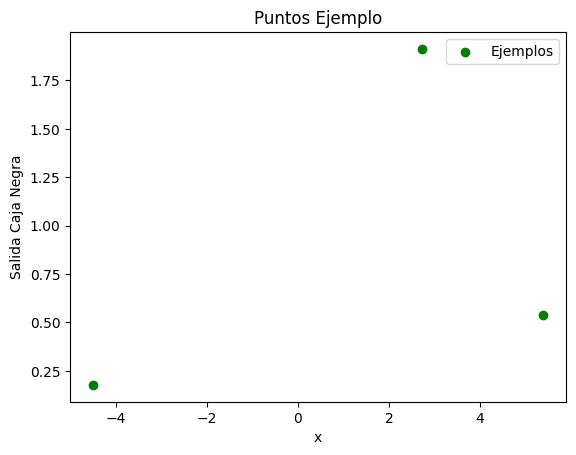

In [ ]:
# Resultado de cada cata:
ejemplo_y = funcion_caja_negra(ejemplo_x)

# Grafico:
plt.scatter(ejemplo_x, ejemplo_y, color='green', label='Ejemplos')
plt.xlabel('x')
plt.ylabel('Salida Caja Negra')
plt.title('Puntos Ejemplo')
plt.legend()
plt.show();

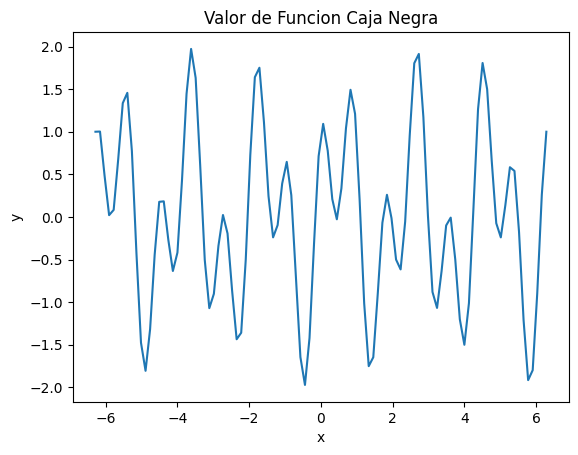

In [ ]:
# Grafica:
plt.plot(rango_x, valor_caja_negra)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Valor de Funcion Caja Negra')
plt.show()

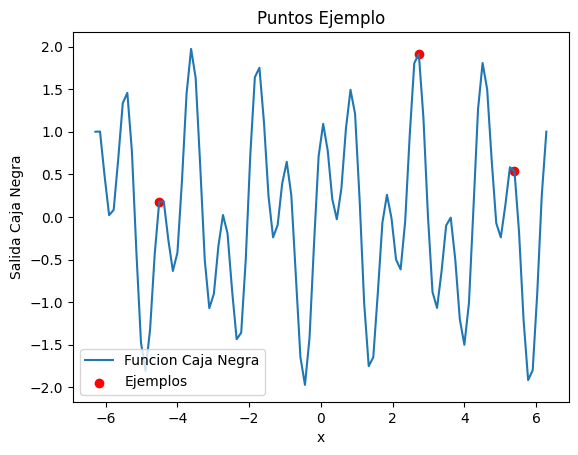

In [ ]:
# Resultado de cada cata:
ejemplo_y = funcion_caja_negra(ejemplo_x)
# Grafico:
plt.plot(rango_x, funcion_caja_negra(rango_x), label='Funcion Caja Negra')
plt.scatter(ejemplo_x, ejemplo_y, color='red', label='Ejemplos')
plt.xlabel('x')
plt.ylabel('Salida Caja Negra')
plt.title('Puntos Ejemplo')
plt.legend();

Creamos un regresor para un proceso Gaussiano, donde cada una de las varibales que generan los puntos de la funcion que tenemos esta normalmente distribuido:

https://es.wikipedia.org/wiki/Proceso_de_Gauss

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Generar de Procesos Gaussianos:
kernel = RBF(length_scale=1.0)
modelo_gp = GaussianProcessRegressor(kernel=kernel)

In [ ]:
ejemplo_x.reshape(-1, 1)

array([[ 5.39465405],
       [-4.5061228 ],
       [ 2.72906028]])

In [ ]:
ejemplo_x

array([ 5.39465405, -4.5061228 ,  2.72906028])

In [ ]:
ejemplo_y

array([0.53976015, 0.17737886, 1.91294952])

In [ ]:
# Ajustamos el modelo a los puntos que conocemos:
modelo_gp.fit(ejemplo_x.reshape(-1, 1), ejemplo_y)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

In [ ]:
rango_x

array([-6.28318531, -6.15625227, -6.02931923, -5.9023862 , -5.77545316,
       -5.64852012, -5.52158709, -5.39465405, -5.26772102, -5.14078798,
       -5.01385494, -4.88692191, -4.75998887, -4.63305583, -4.5061228 ,
       -4.37918976, -4.25225672, -4.12532369, -3.99839065, -3.87145761,
       -3.74452458, -3.61759154, -3.4906585 , -3.36372547, -3.23679243,
       -3.10985939, -2.98292636, -2.85599332, -2.72906028, -2.60212725,
       -2.47519421, -2.34826118, -2.22132814, -2.0943951 , -1.96746207,
       -1.84052903, -1.71359599, -1.58666296, -1.45972992, -1.33279688,
       -1.20586385, -1.07893081, -0.95199777, -0.82506474, -0.6981317 ,
       -0.57119866, -0.44426563, -0.31733259, -0.19039955, -0.06346652,
        0.06346652,  0.19039955,  0.31733259,  0.44426563,  0.57119866,
        0.6981317 ,  0.82506474,  0.95199777,  1.07893081,  1.20586385,
        1.33279688,  1.45972992,  1.58666296,  1.71359599,  1.84052903,
        1.96746207,  2.0943951 ,  2.22132814,  2.34826118,  2.47

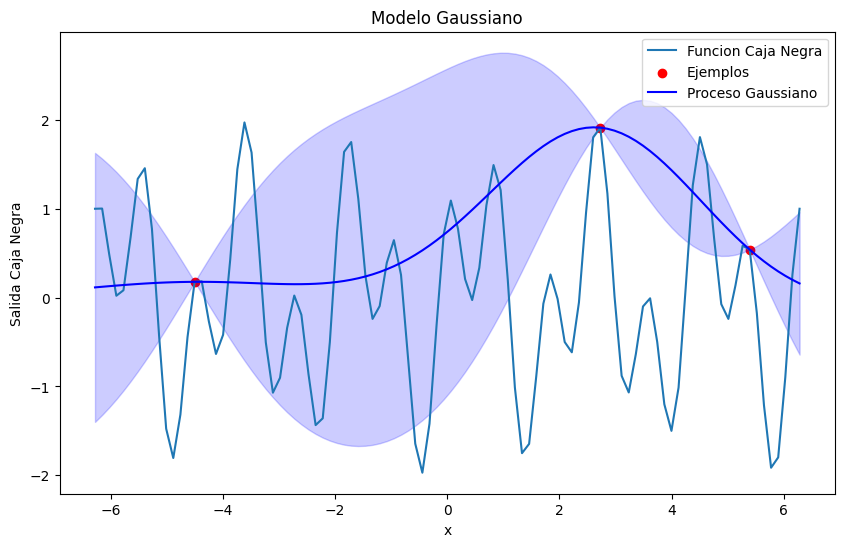

In [ ]:
# Generamos unas predicciones con el modelo que hemos obtenido de pasarle
# las catas al regresor:
y_pred, y_std = modelo_gp.predict(rango_x.reshape(-1, 1), return_std=True)

# Grafica:
plt.figure(figsize=(10, 6))
plt.plot(rango_x, funcion_caja_negra(rango_x), label='Funcion Caja Negra')
plt.scatter(ejemplo_x, ejemplo_y, color='red', label='Ejemplos')
plt.plot(rango_x, y_pred, color='blue', label='Proceso Gaussiano')
plt.fill_between(rango_x, y_pred - 2*y_std, y_pred + 2*y_std, color='blue', alpha=0.2)
plt.xlabel('x')
plt.ylabel('Salida Caja Negra')
plt.title('Modelo Gaussiano')
plt.legend()
plt.show();

Podemos calcular la mejora esperada al hacer una nueva cata ya que tenemos la "incertidumbre" entre los puntos con los cambios de valor mas grandes entre dos puntos conocidos:

In [ ]:
def mejora_esperada(x, modelo, mejor_y):
    y_pred, y_std = modelo.predict(x.reshape(-1, 1), return_std=True)
    z = (y_pred - mejor_y) / y_std
    mejora = (y_pred - mejor_y) * norm.cdf(z) + y_std * norm.pdf(z)
    return mejora

In [ ]:
from scipy.stats import norm

In [ ]:
mejora_esperada(np.array([[-1.5]]), modelo_gp, 1)

array([0.11244256])

Mejor X:2.7290602849365886
Mejor Y:1.912949520111023


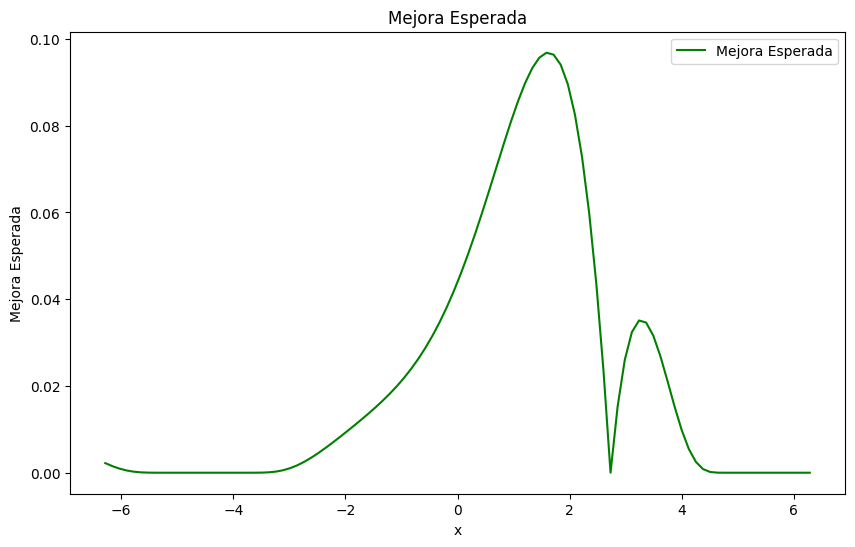

In [ ]:
from scipy.stats import norm

def mejora_esperada(x, modelo, mejor_y):
    y_pred, y_std = modelo.predict(x.reshape(-1, 1), return_std=True)
    z = (y_pred - mejor_y) / y_std
    mejora = (y_pred - mejor_y) * norm.cdf(z) + y_std * norm.pdf(z)
    return mejora

# Determinamos el punto que puede aportar mas informacion:
mejor_idx = np.argmax(ejemplo_y)
mejor_x = ejemplo_x[mejor_idx]
mejor_y = ejemplo_y[mejor_idx]
print(f"Mejor X:{mejor_x}")
print(f"Mejor Y:{mejor_y}")

mejora = mejora_esperada(rango_x, modelo_gp, mejor_y)

# Figura de la mejora esperada:
plt.figure(figsize=(10, 6))
plt.plot(rango_x, mejora, color='green', label='Mejora Esperada')
plt.xlabel('x')
plt.ylabel('Mejora Esperada')
plt.title('Mejora Esperada')
plt.legend()
plt.show()

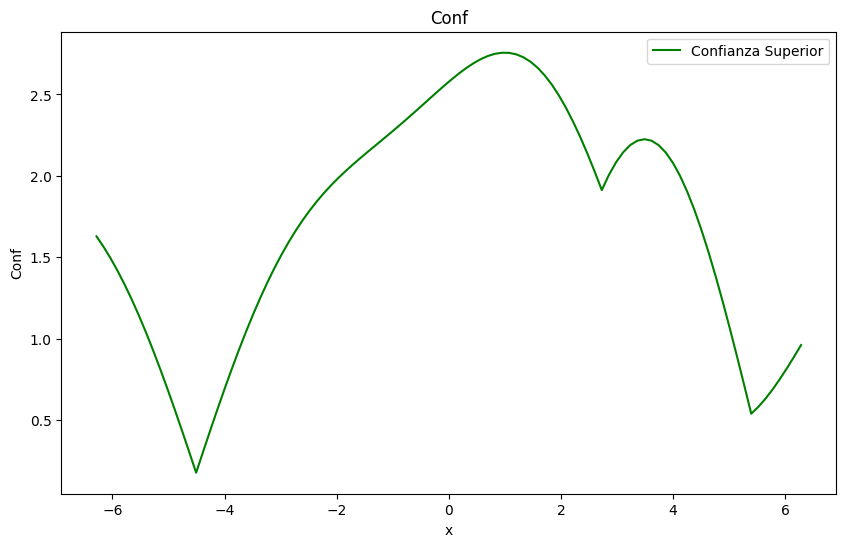

In [ ]:
def conf_superior(x, modelo, beta):
    y_pred, y_std = modelo.predict(x.reshape(-1, 1), return_std=True)
    conf = y_pred + beta * y_std
    return conf

# Beta es el factor que nos indica cuanto debemos "premiar" la
# desviacion estandard.
beta = 2.0
# UCB - Upper Confidence Bound: Limite de Confianza Superior.
conf = conf_superior(rango_x, modelo_gp, beta)

plt.figure(figsize=(10, 6))
plt.plot(rango_x, conf, color='green', label='Confianza Superior')
plt.xlabel('x')
plt.ylabel('Conf')
plt.title('Conf')
plt.legend()
plt.show()

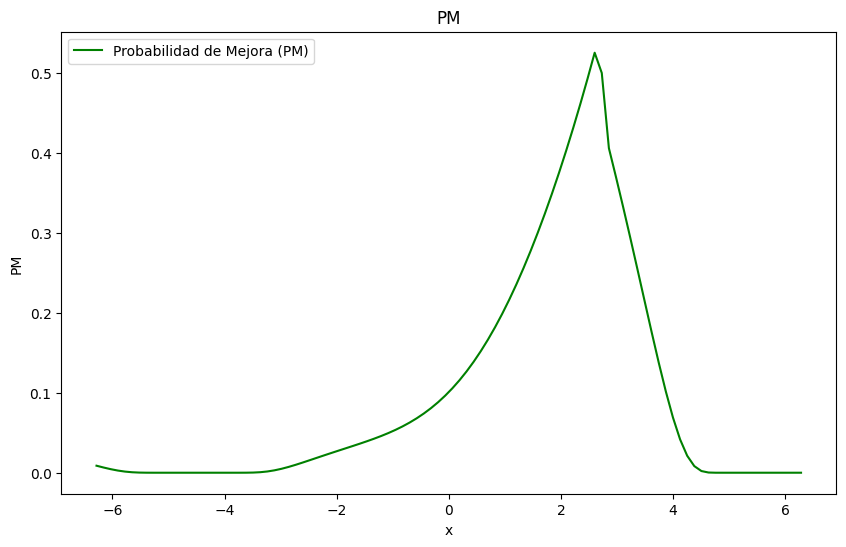

In [ ]:
def probabilidad_mejora(x, modelo, mejor_y):
    y_pred, y_std = modelo.predict(x.reshape(-1, 1), return_std=True)
    z = (y_pred - mejor_y) / y_std
    pi = norm.cdf(z)
    return pi

# Probabilidad de Mejorar el Modelo:
pm = probabilidad_mejora(rango_x, modelo_gp, mejor_y)


plt.figure(figsize=(10, 6))
plt.plot(rango_x, pm, color='green', label='Probabilidad de Mejora (PM)')
plt.xlabel('x')
plt.ylabel('PM')
plt.title('PM')
plt.legend()
plt.show()

Apliquemos este proceso iterativamente de manera automatica. Hacemos una cata, evaluamos el modelo, decidimos donde hacer una nueva dependiendo de la maxima proabilidad de ganar mas informacion y volvemos a evaluar. En este caso tenemos la posibilidad de hacer tantas catas como iteraciones:

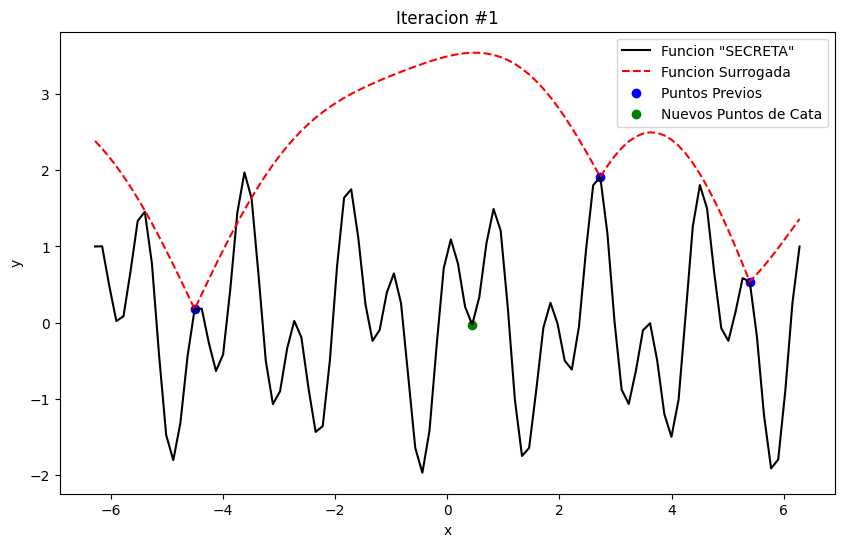

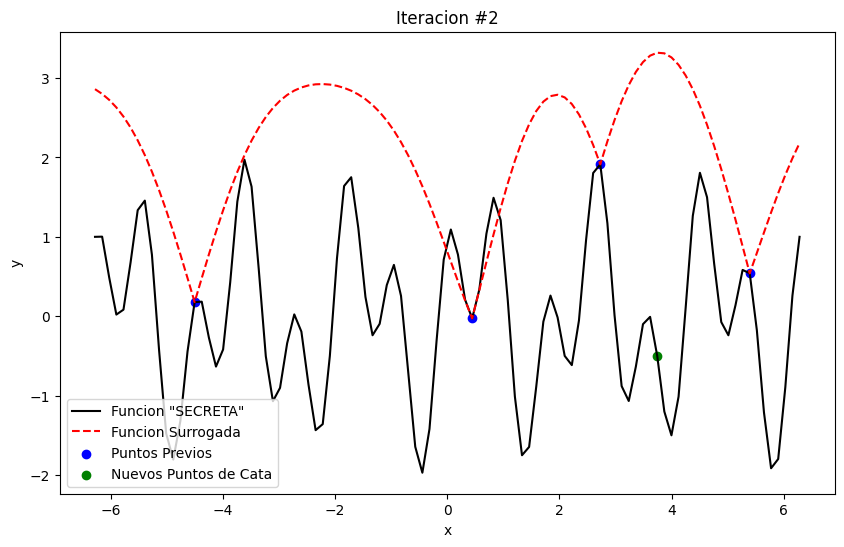

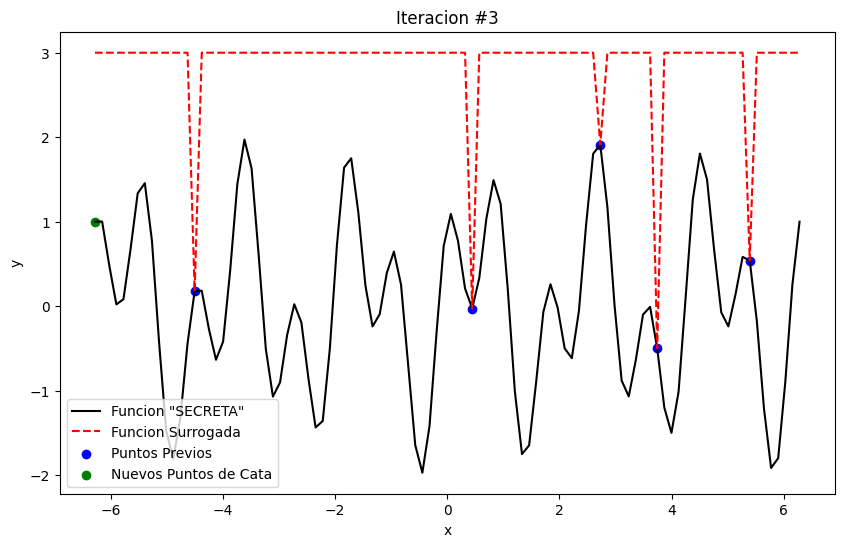

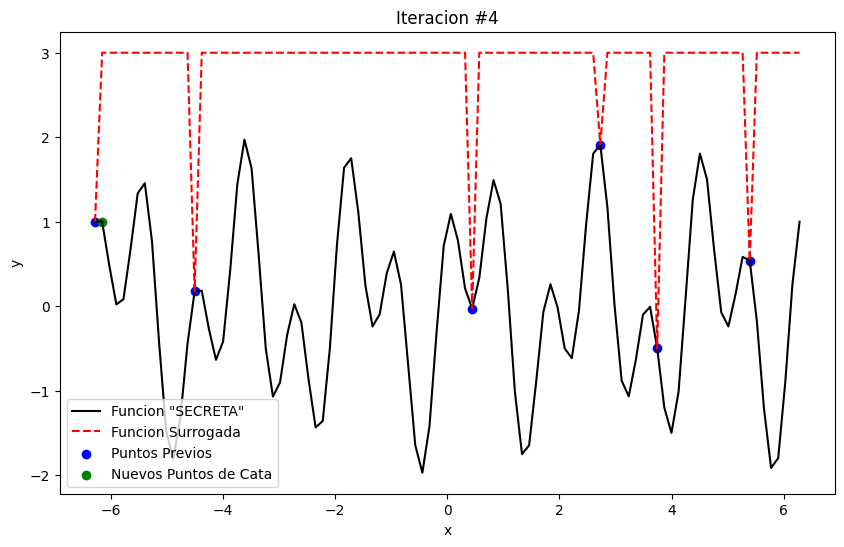

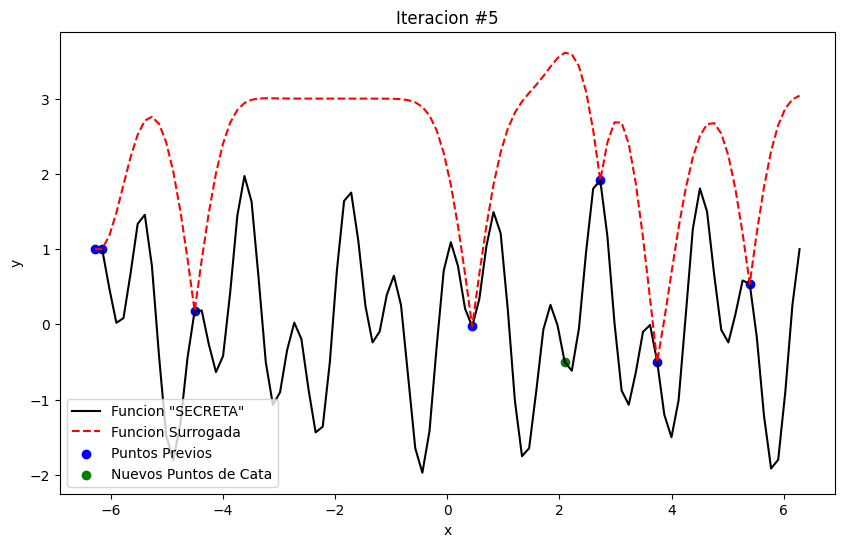

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


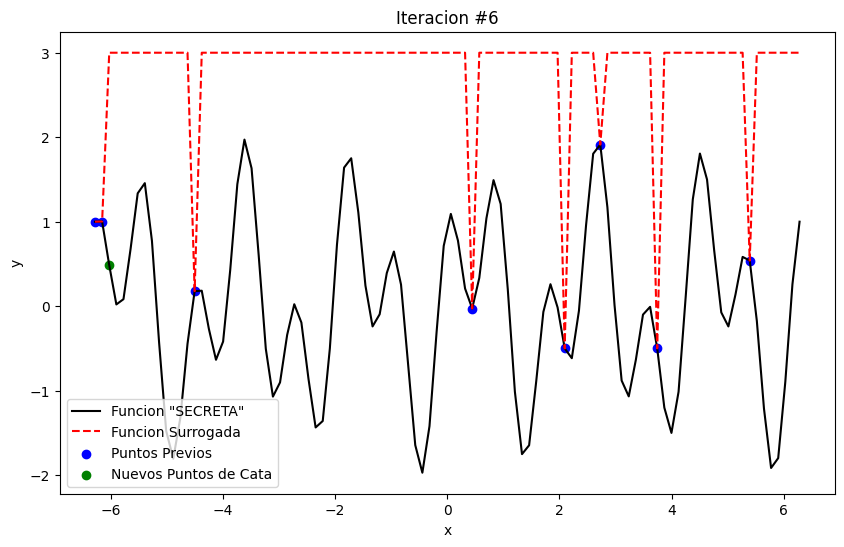

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


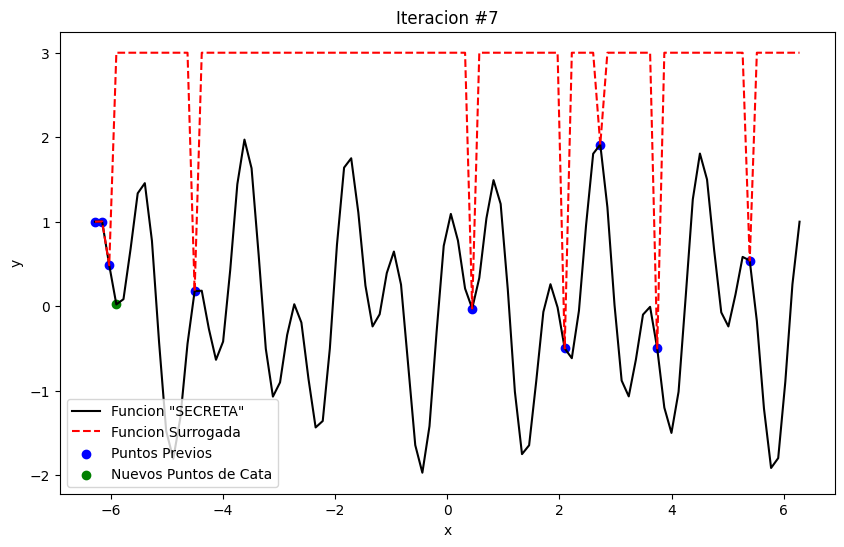

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


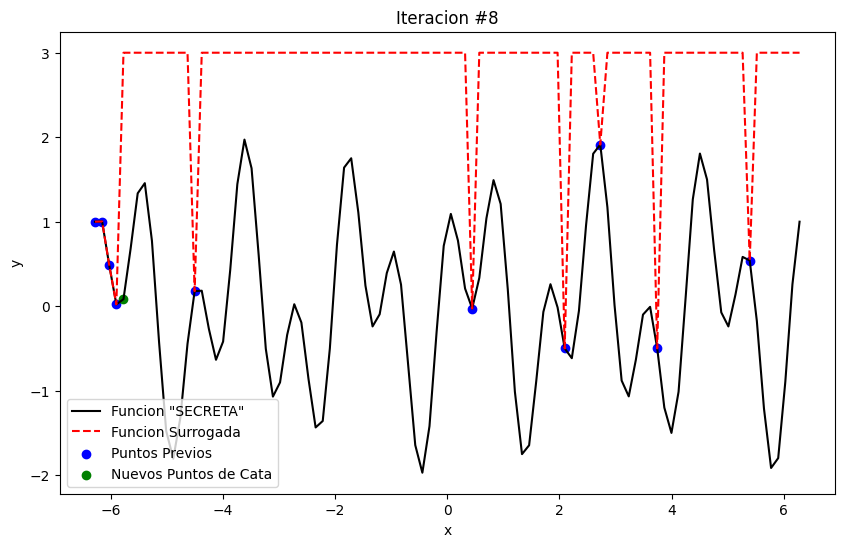

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


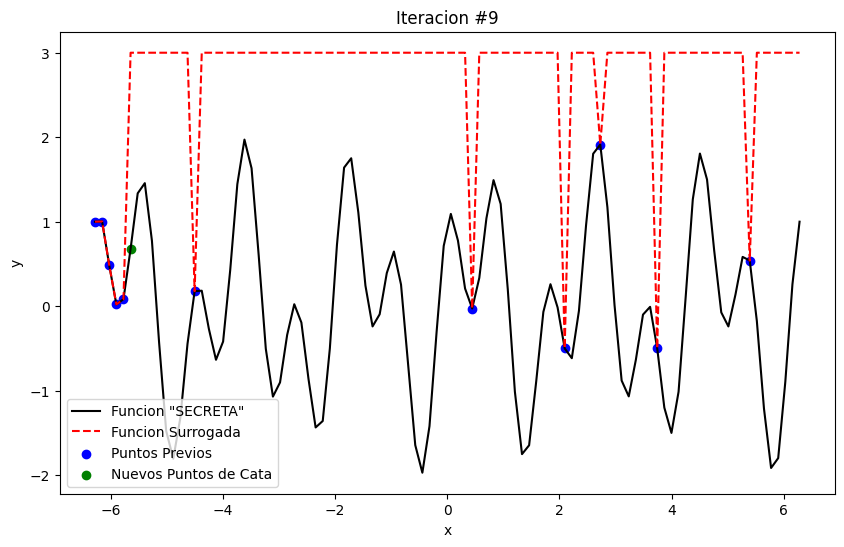

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


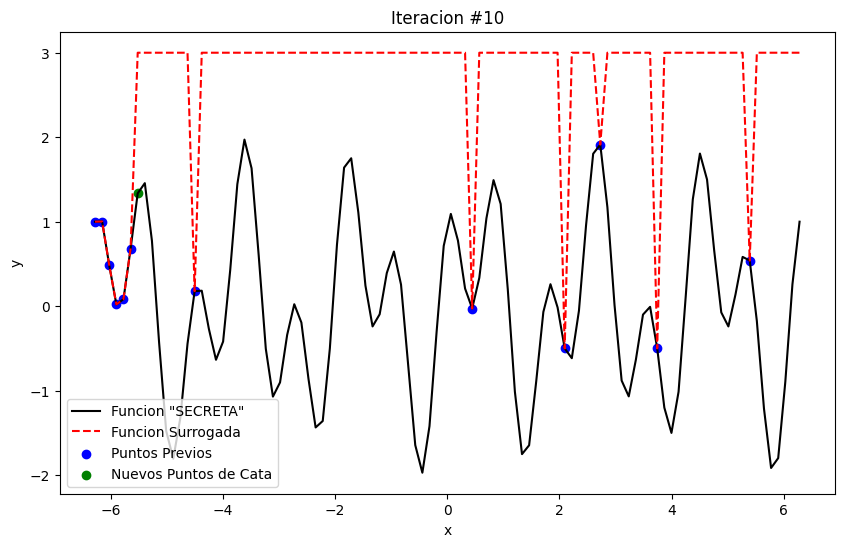

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


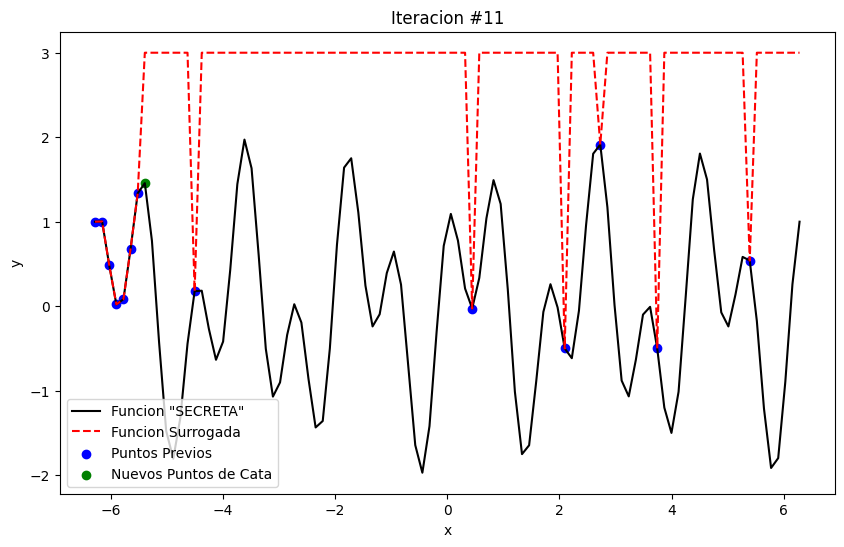

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


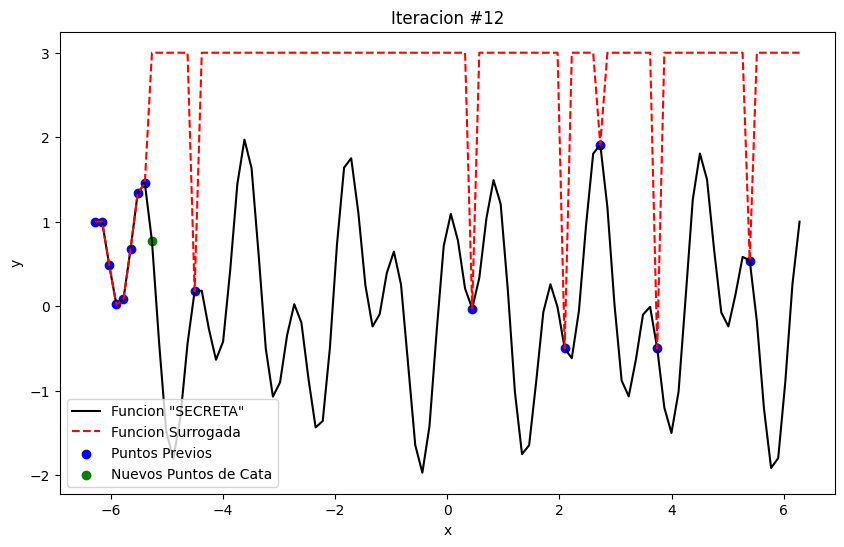

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


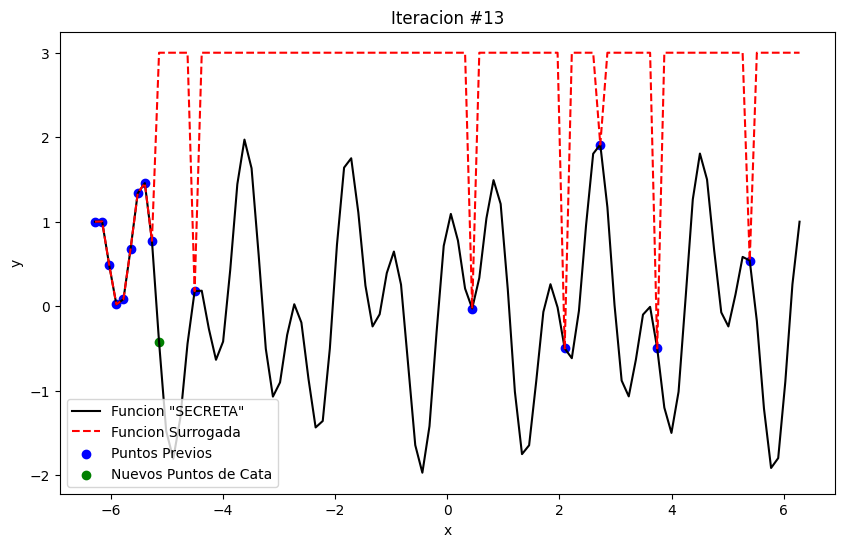

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


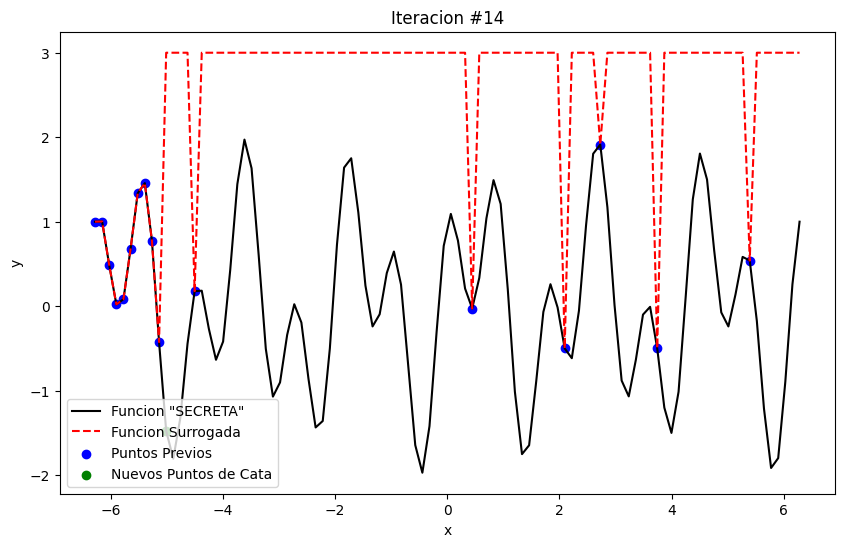

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


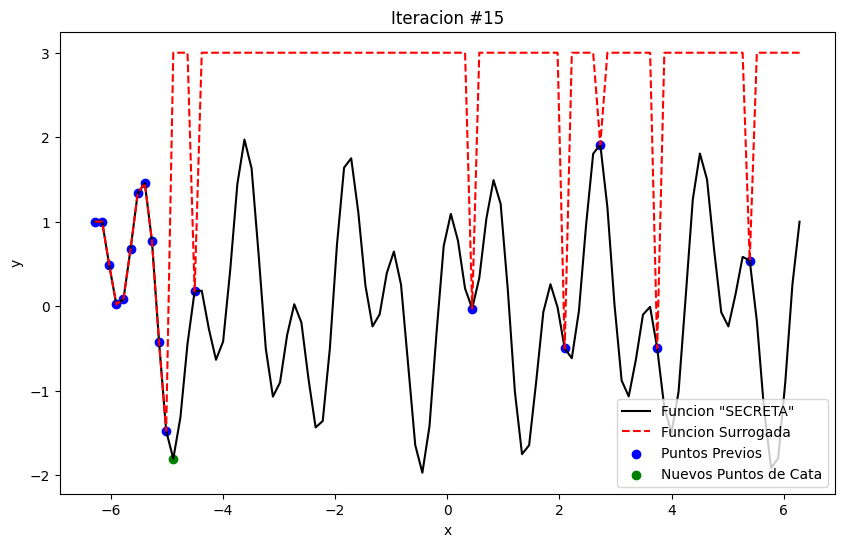

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


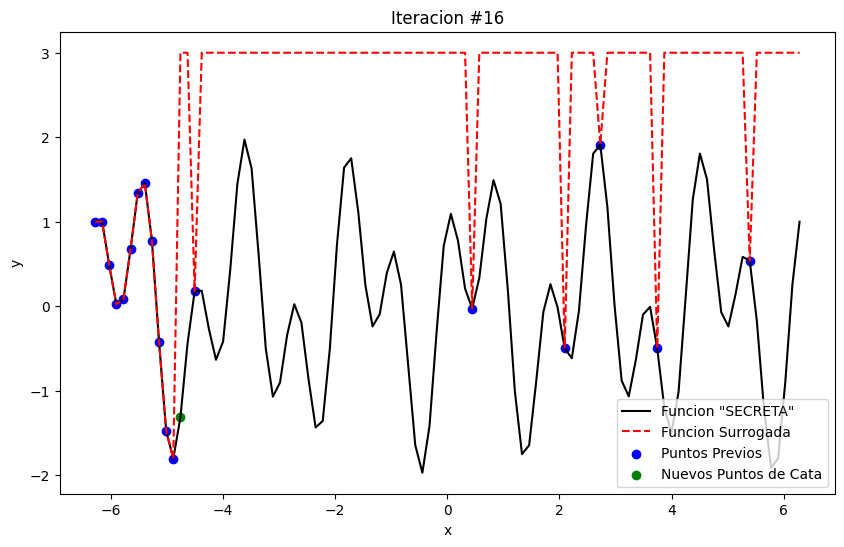

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


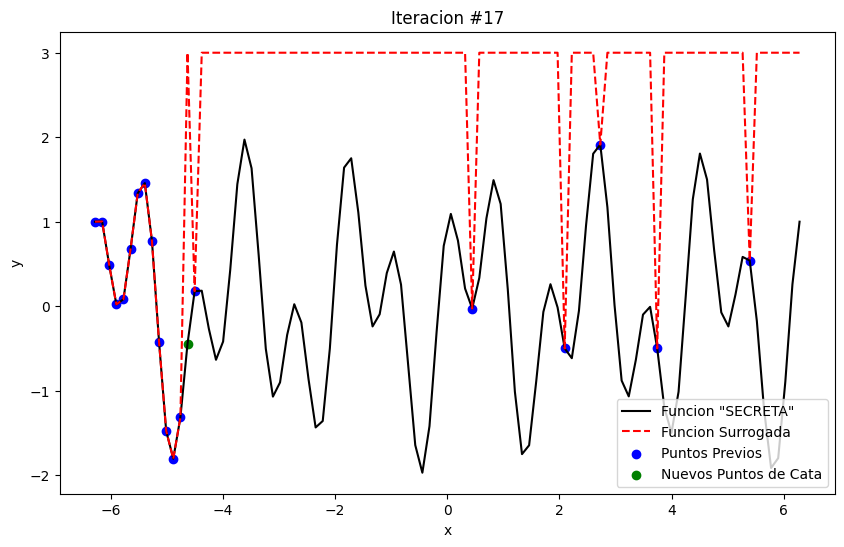

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


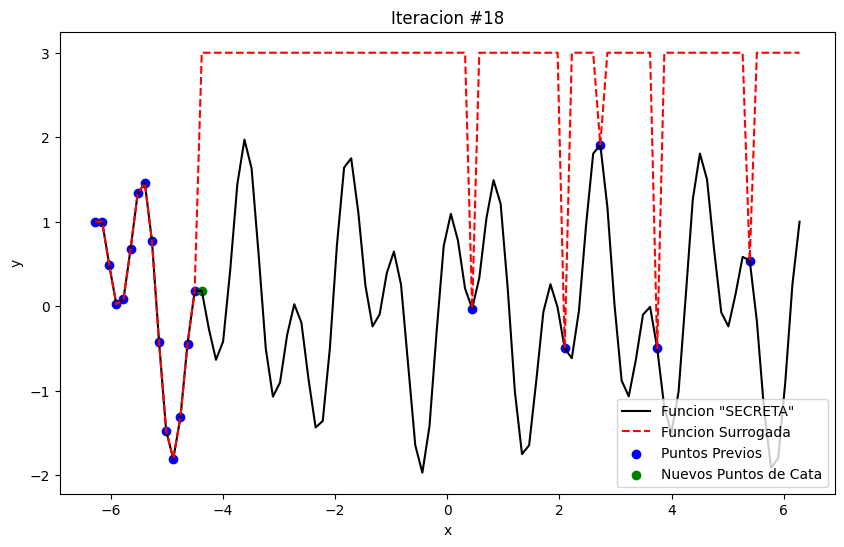

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


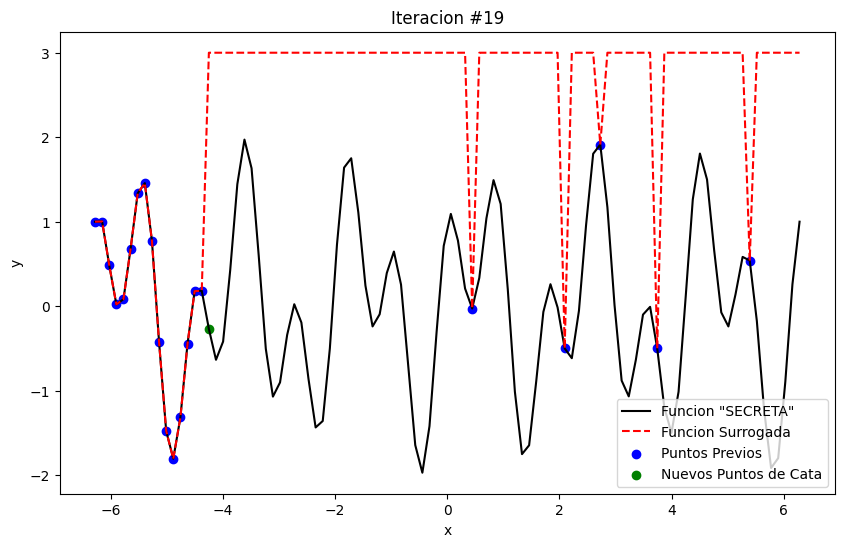

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


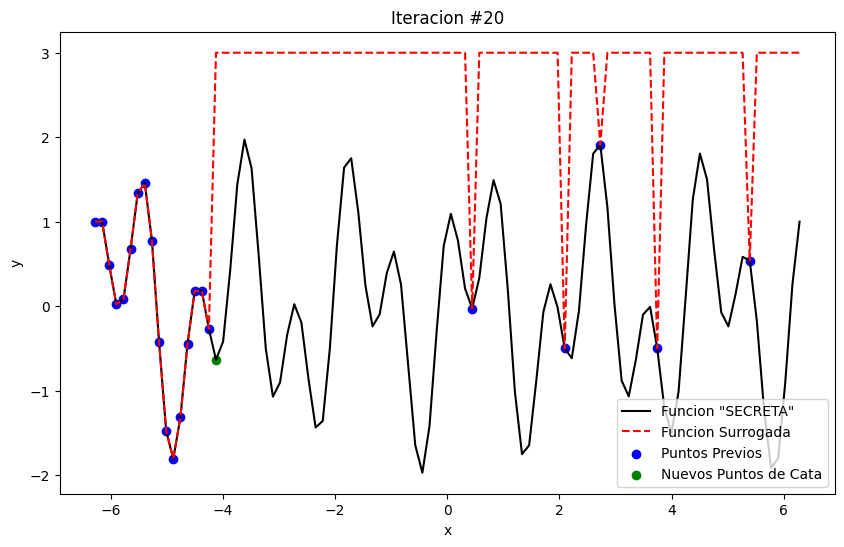

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


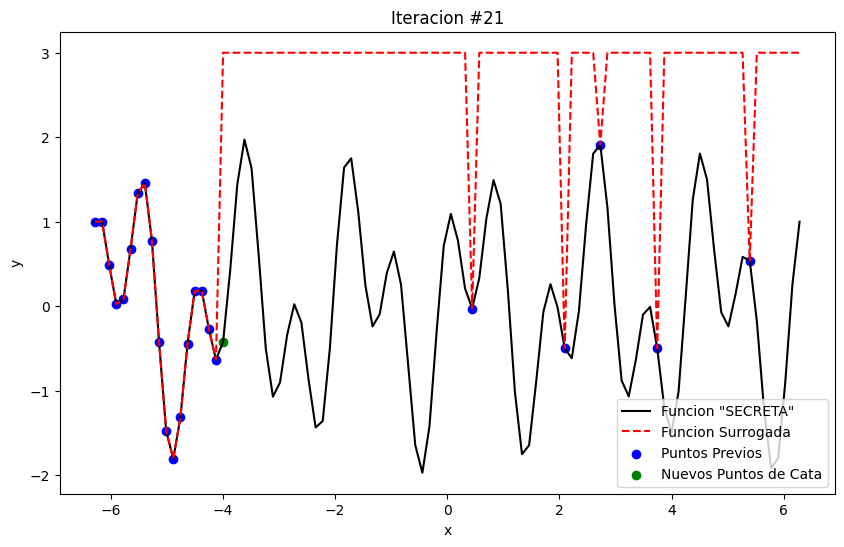

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


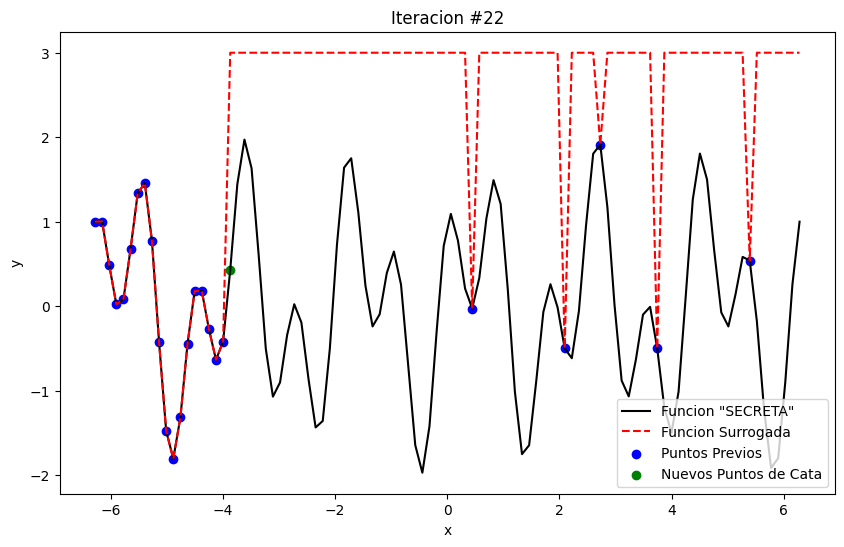

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


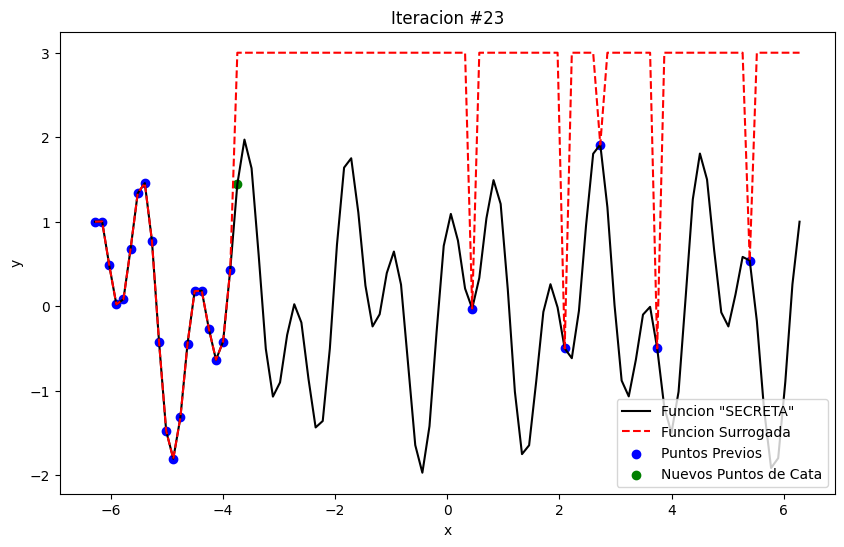

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


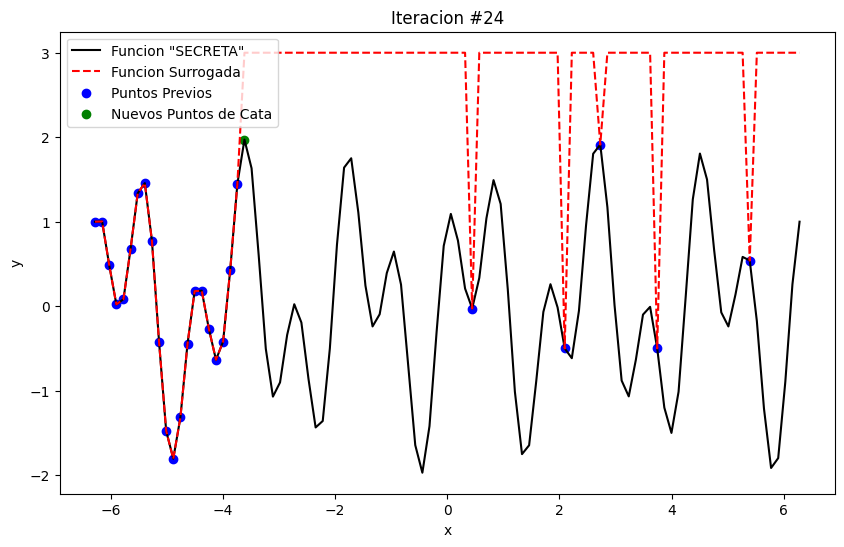

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


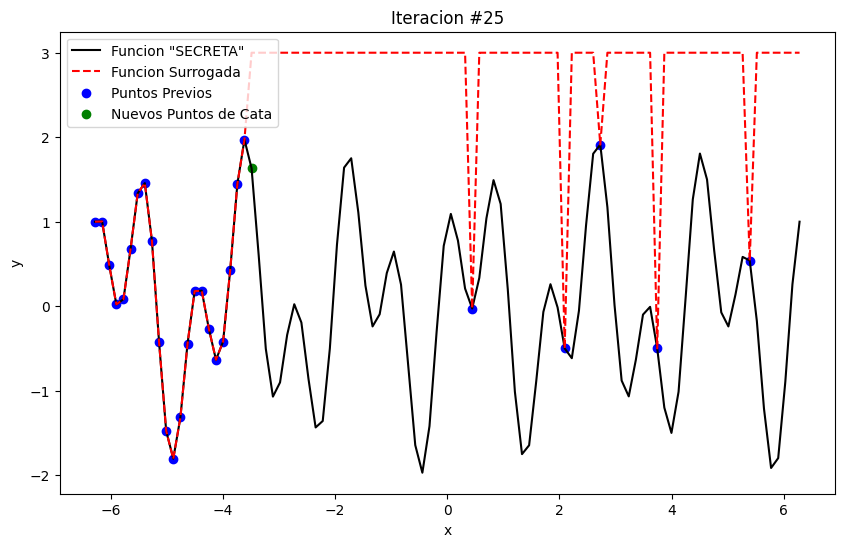

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


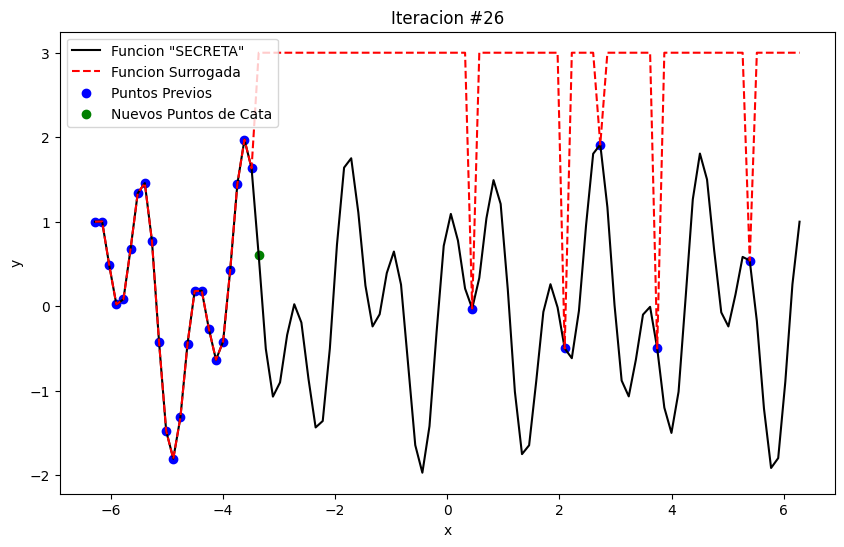

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


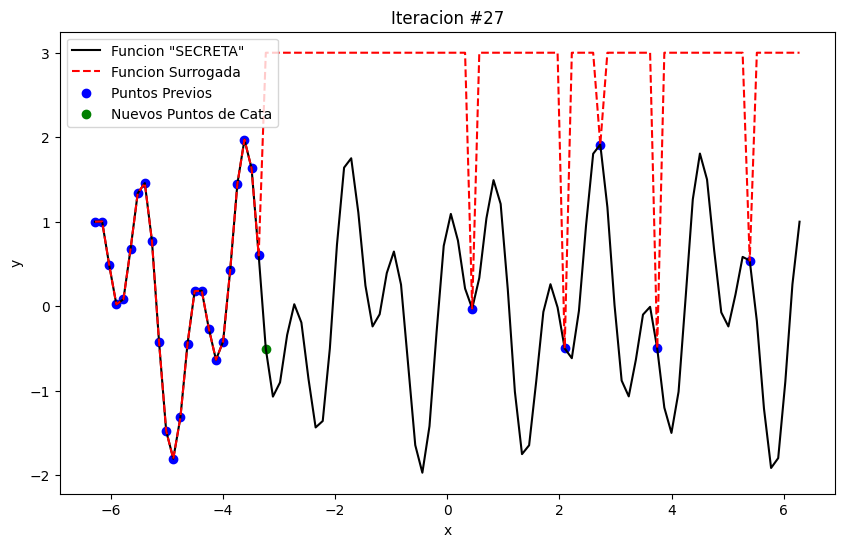

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


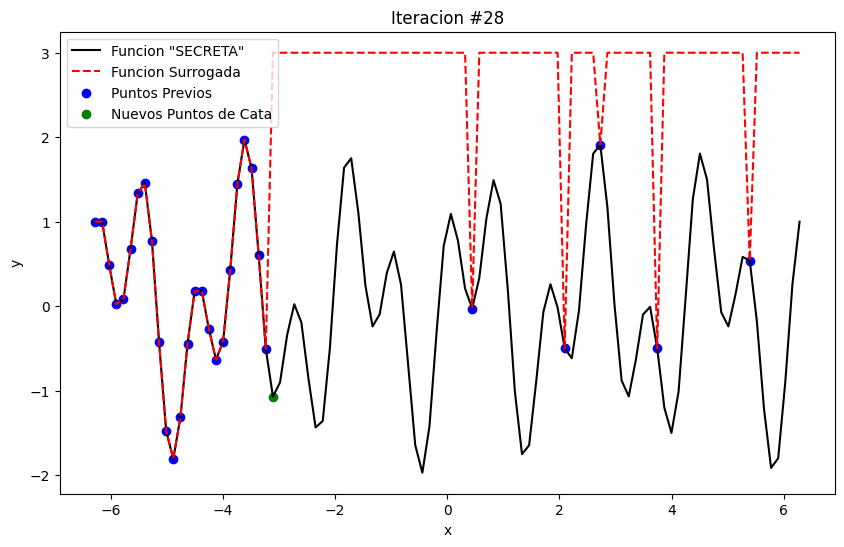

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


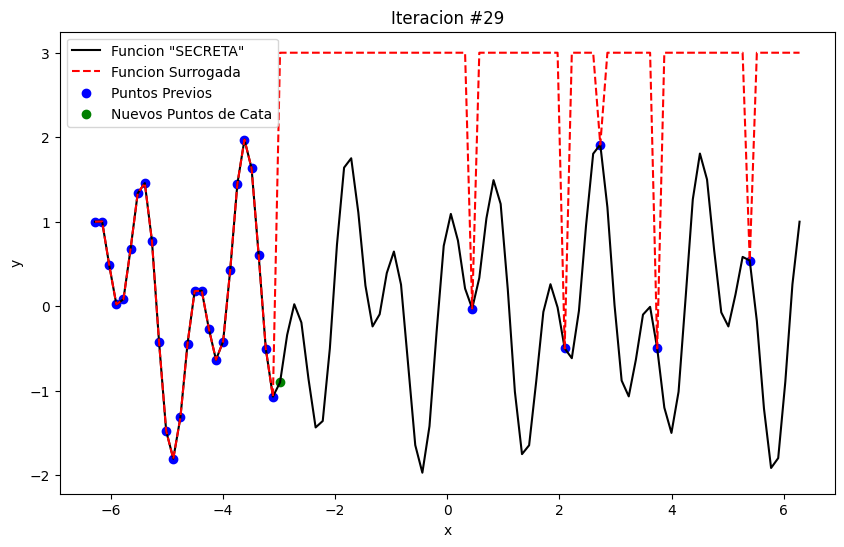

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


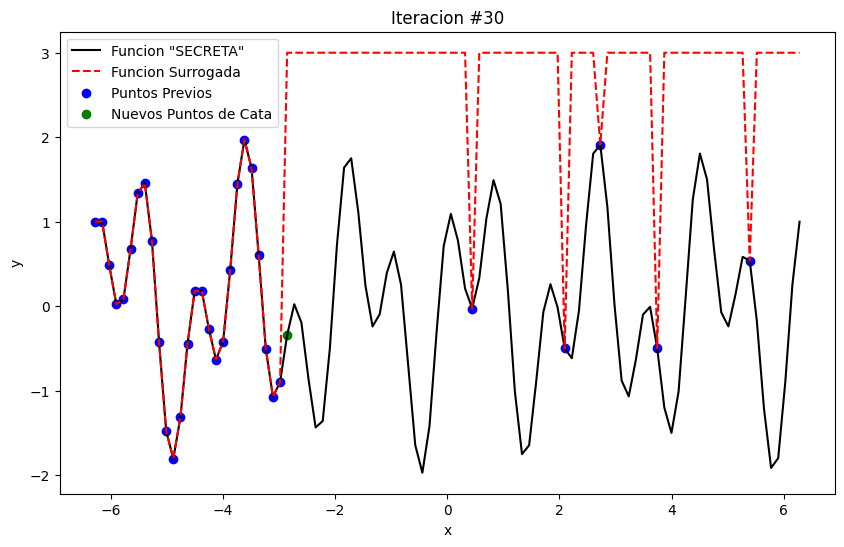

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


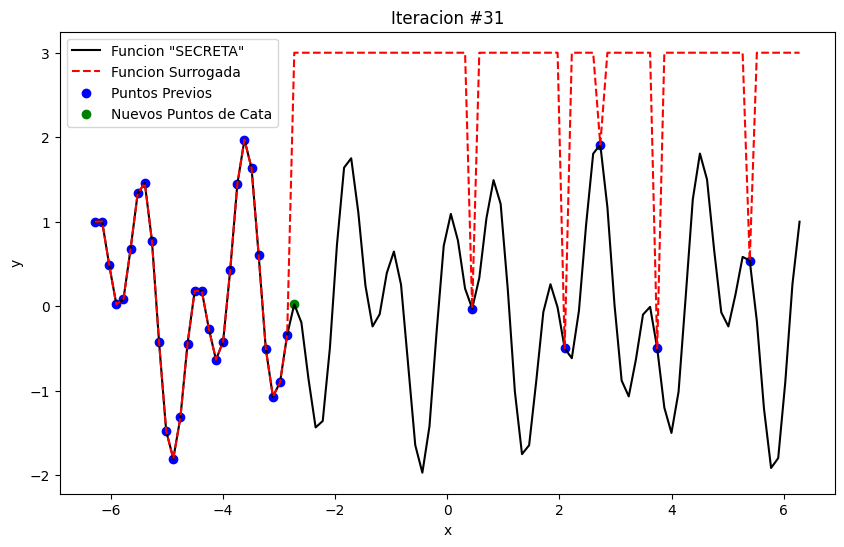

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


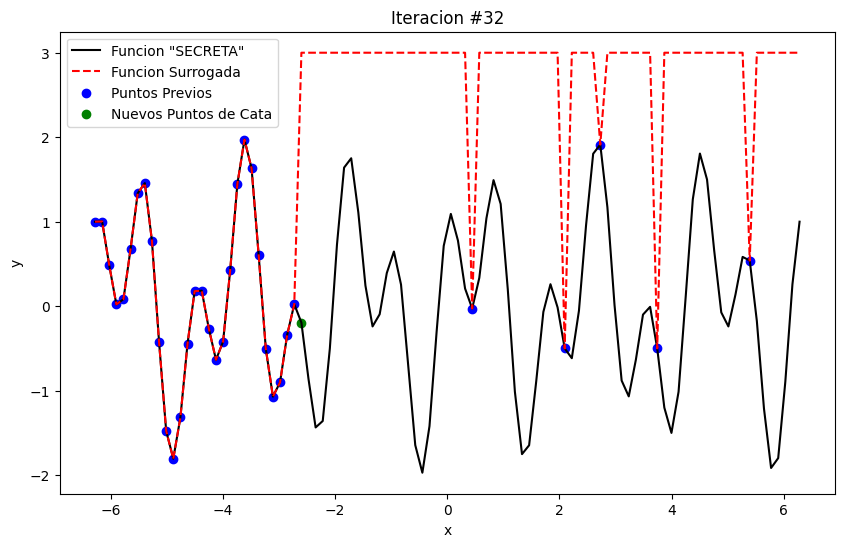

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


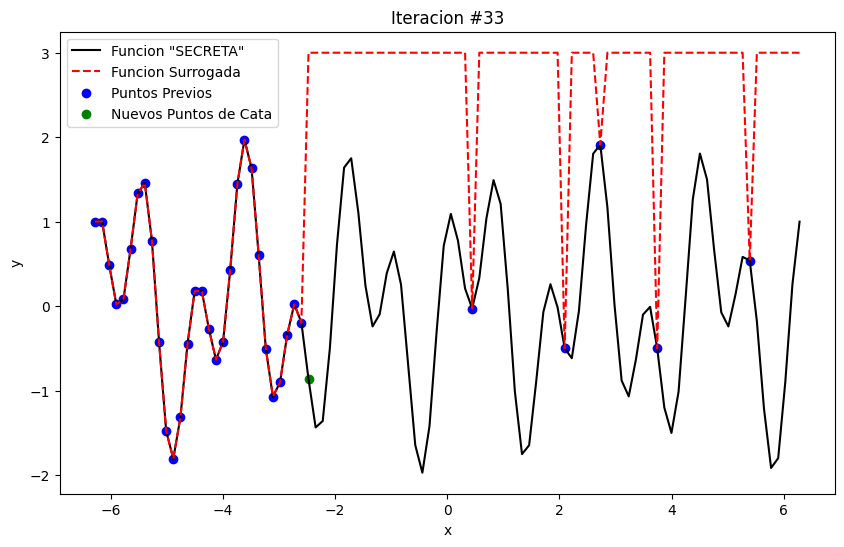

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


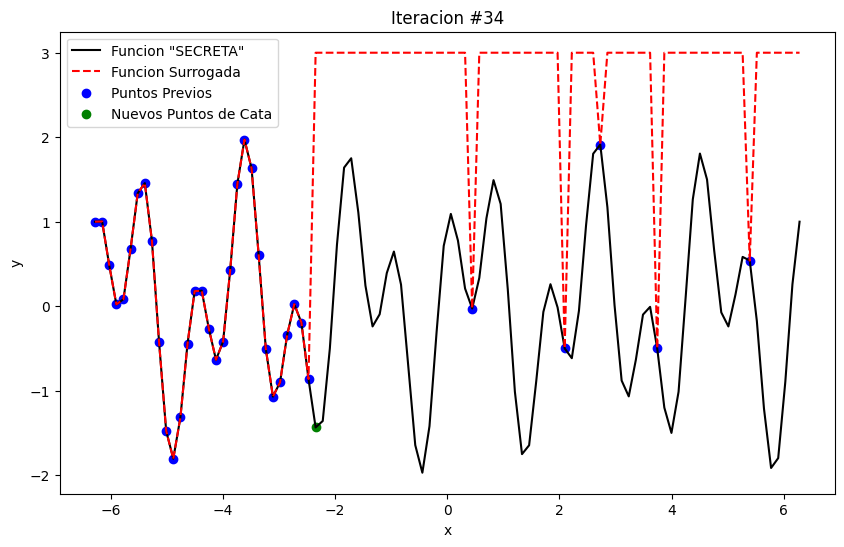

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


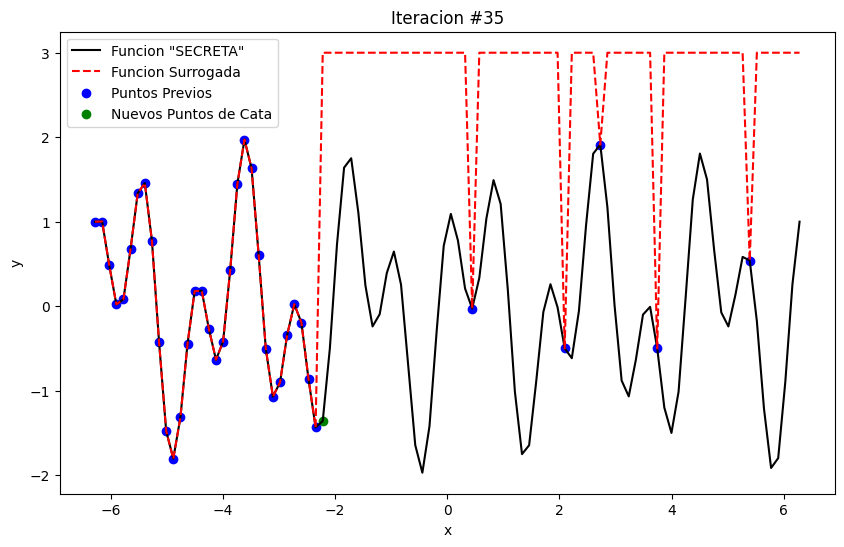

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


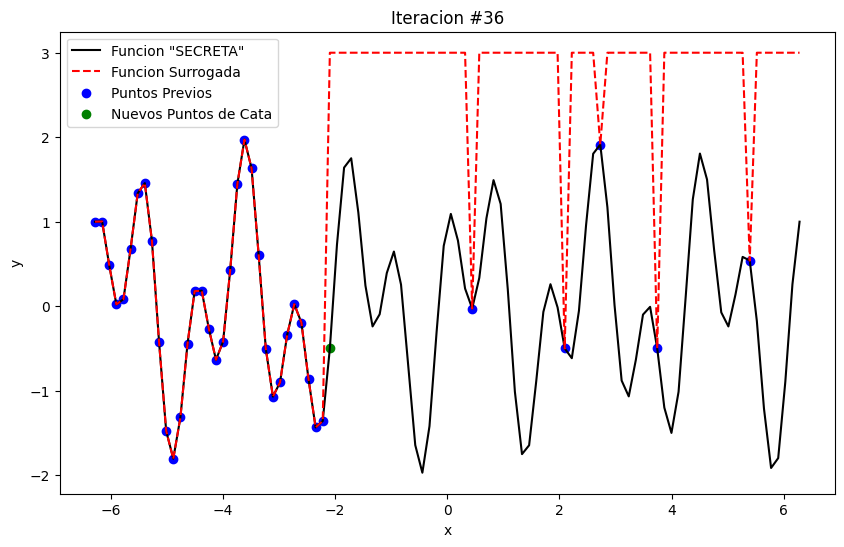

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


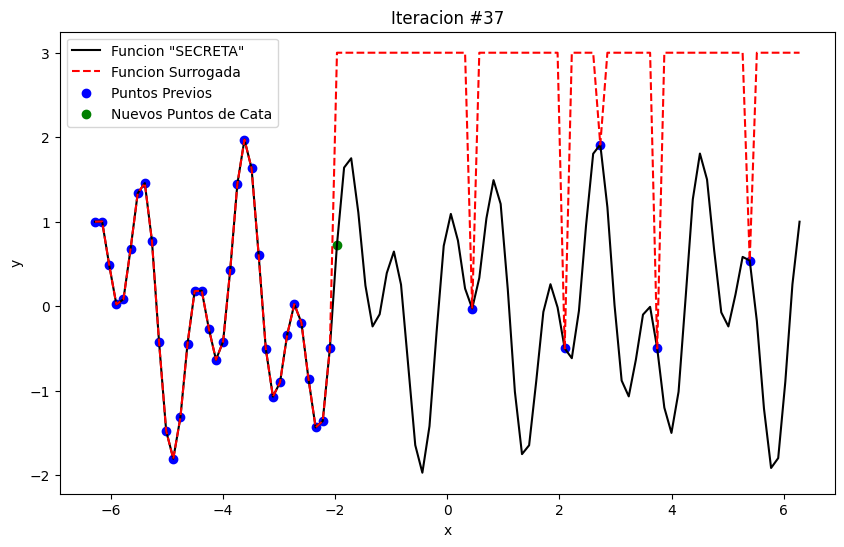

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


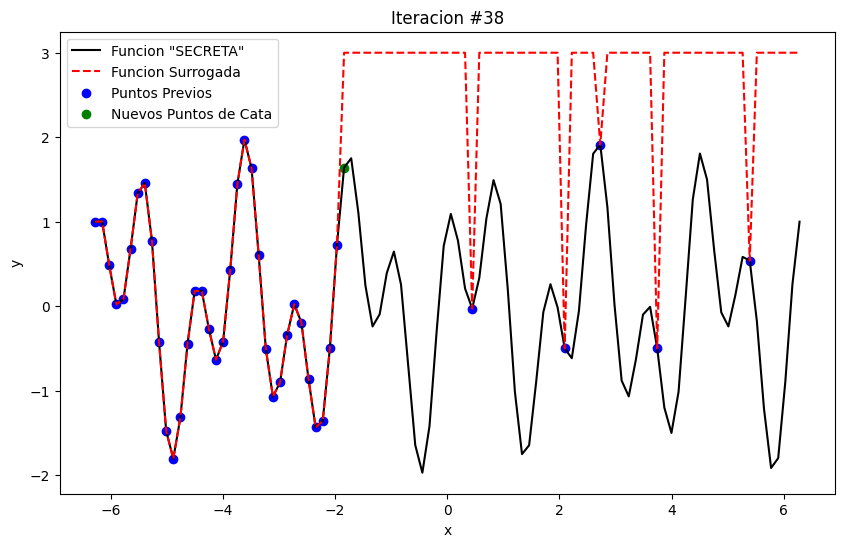

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


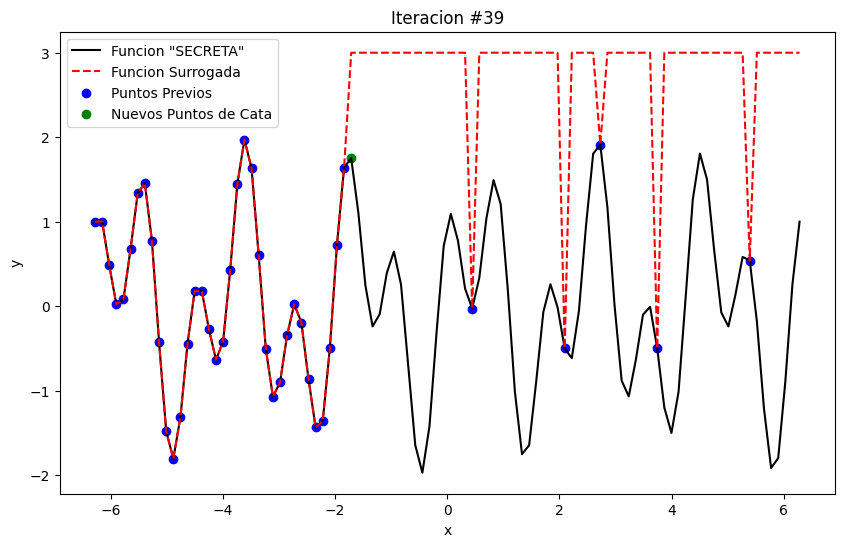

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


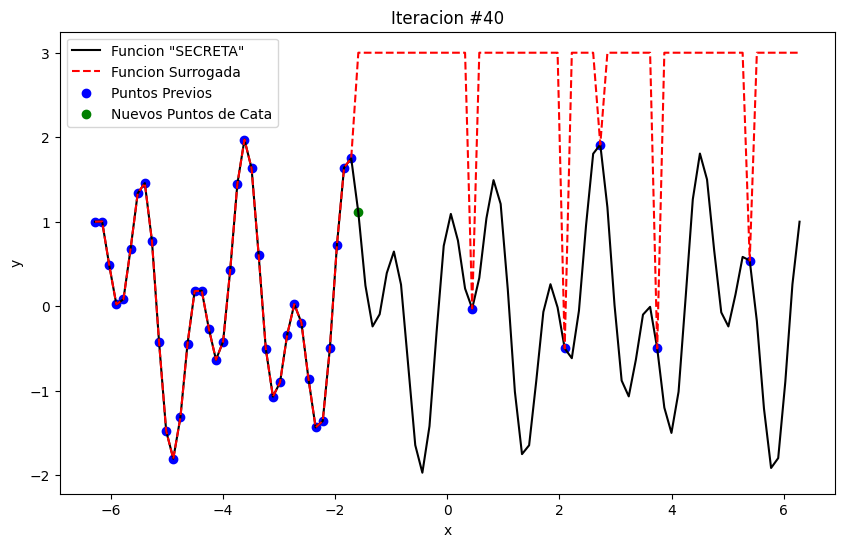

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


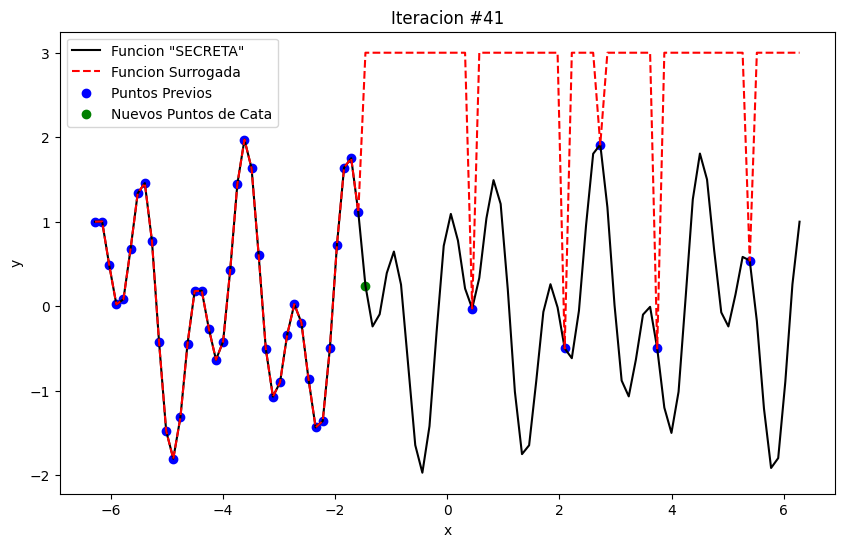

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


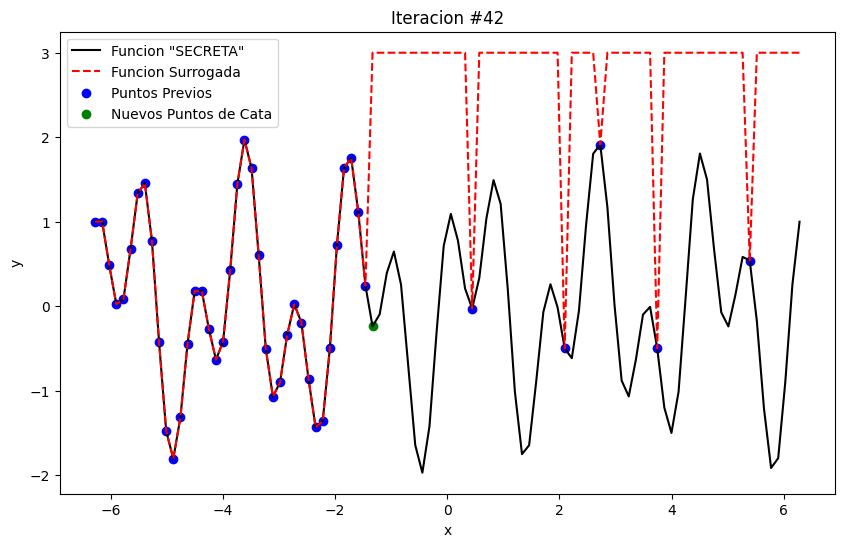

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


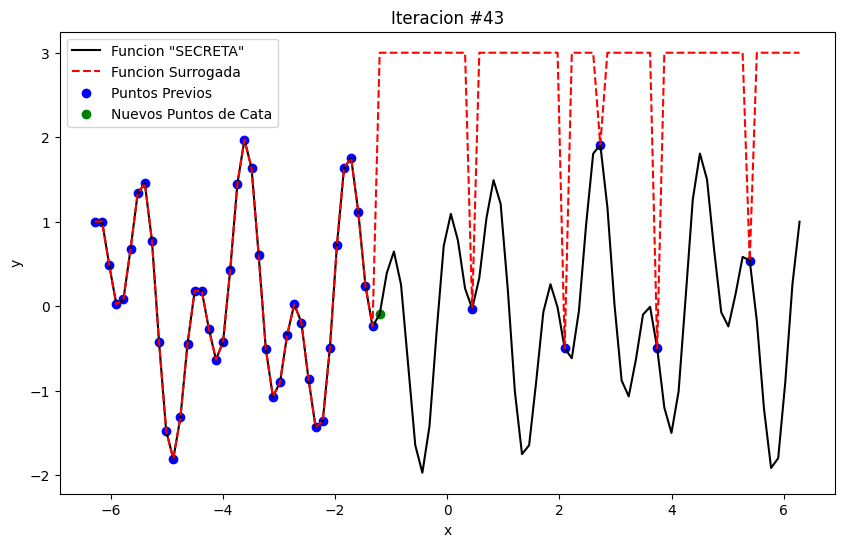

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


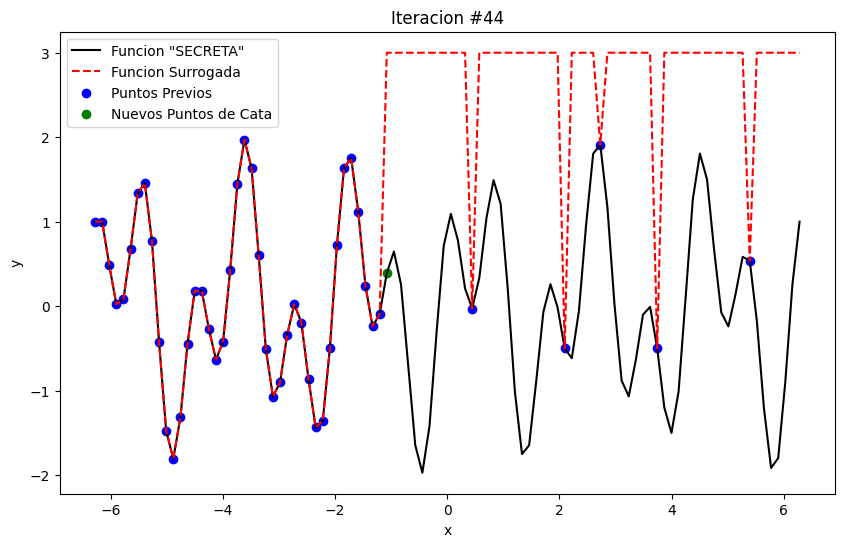

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


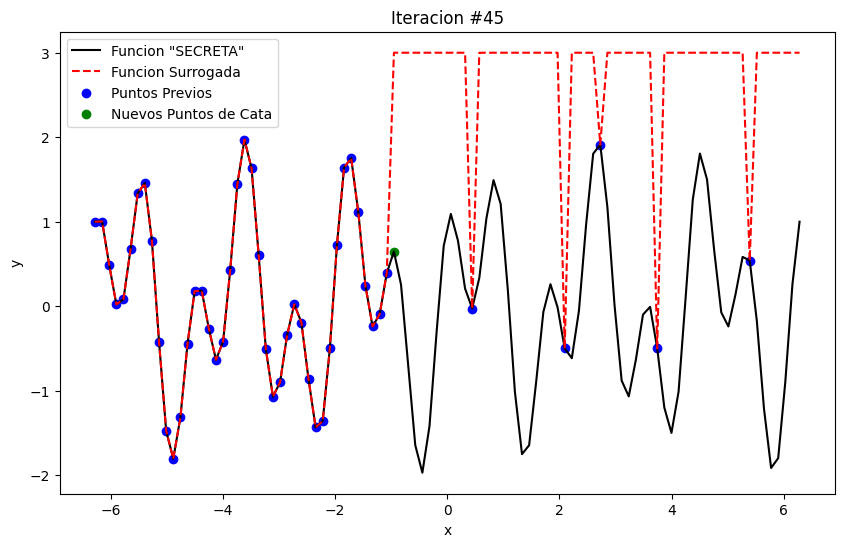

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


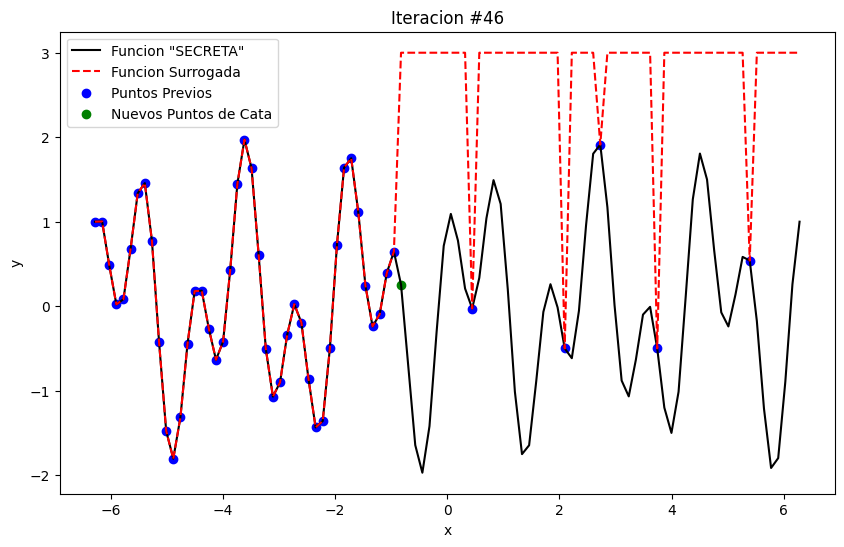

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


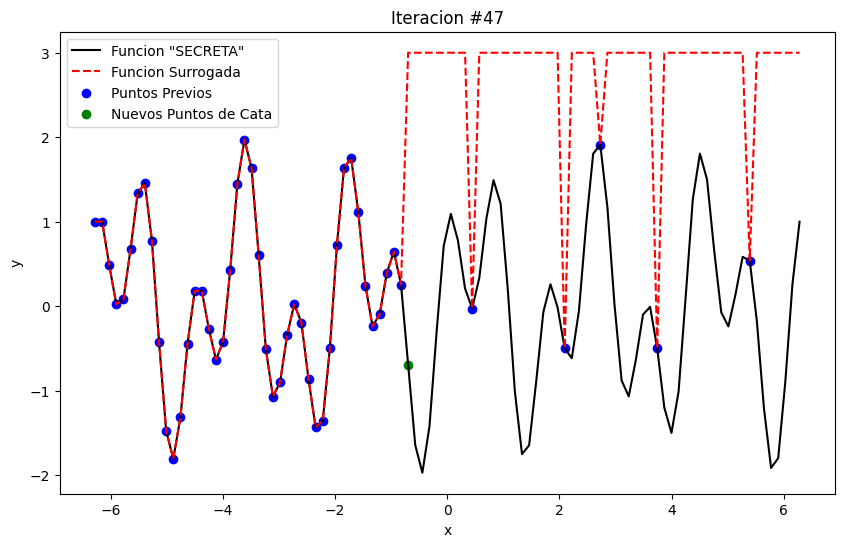

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


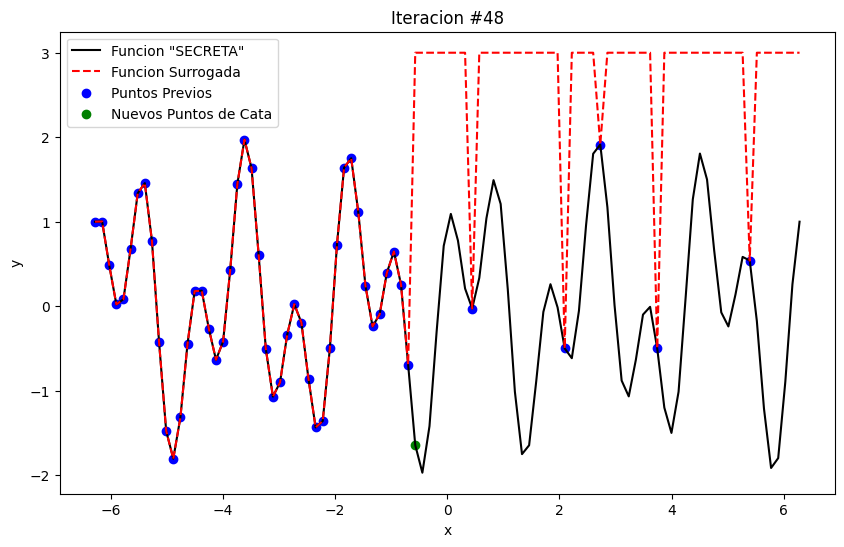

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


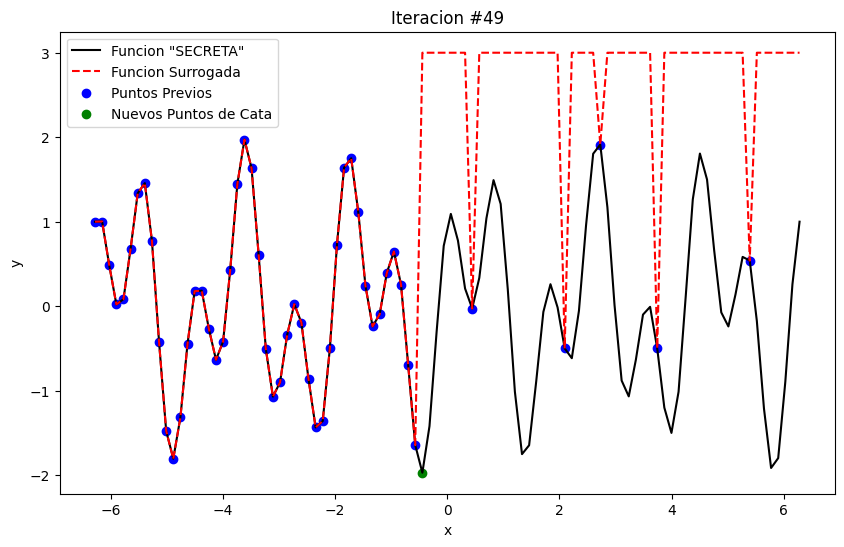

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


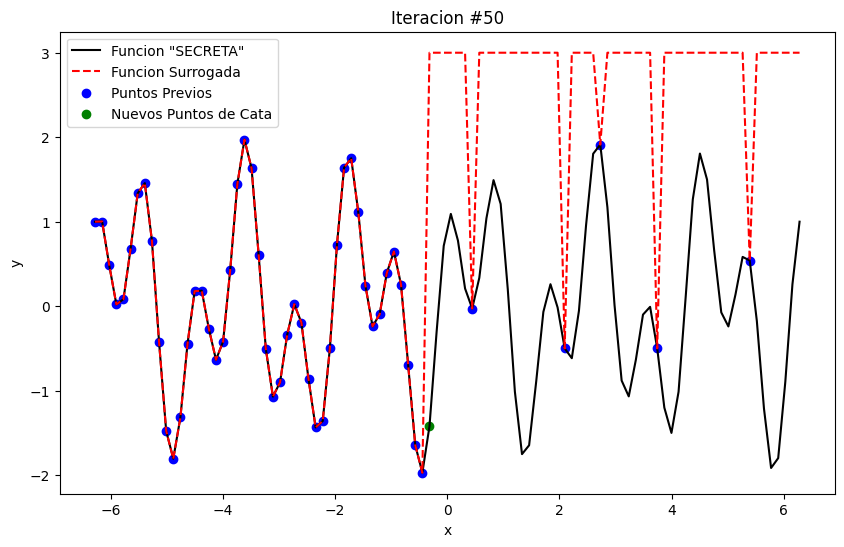

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


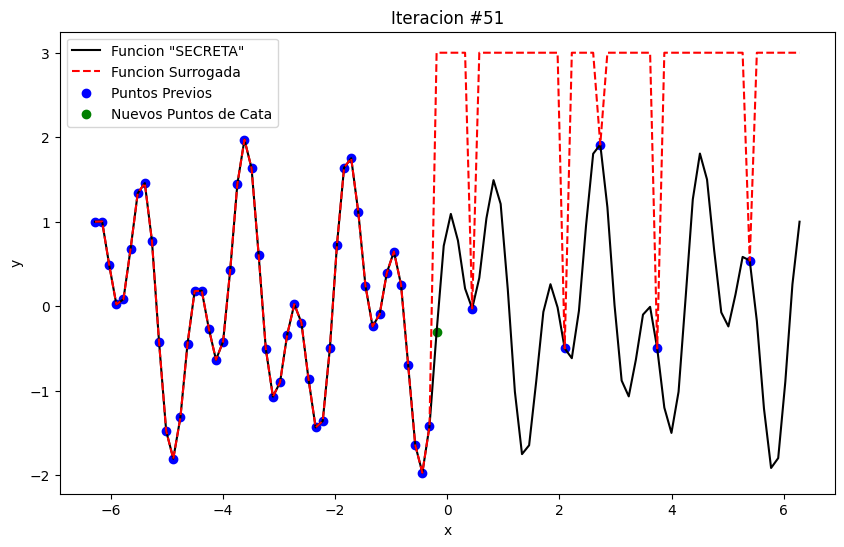

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


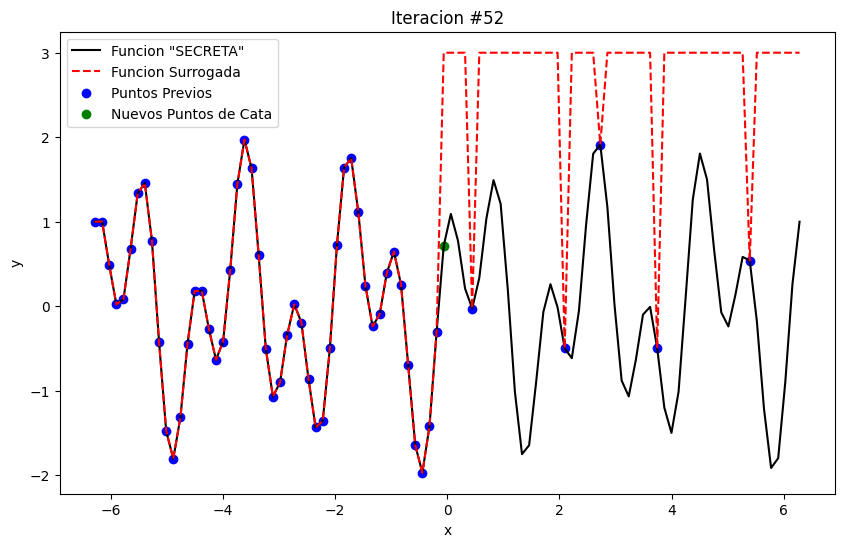

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


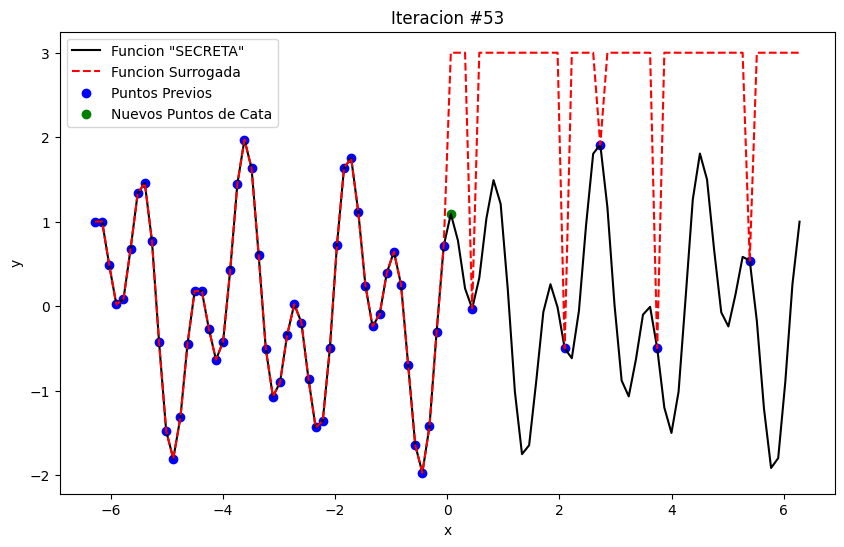

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


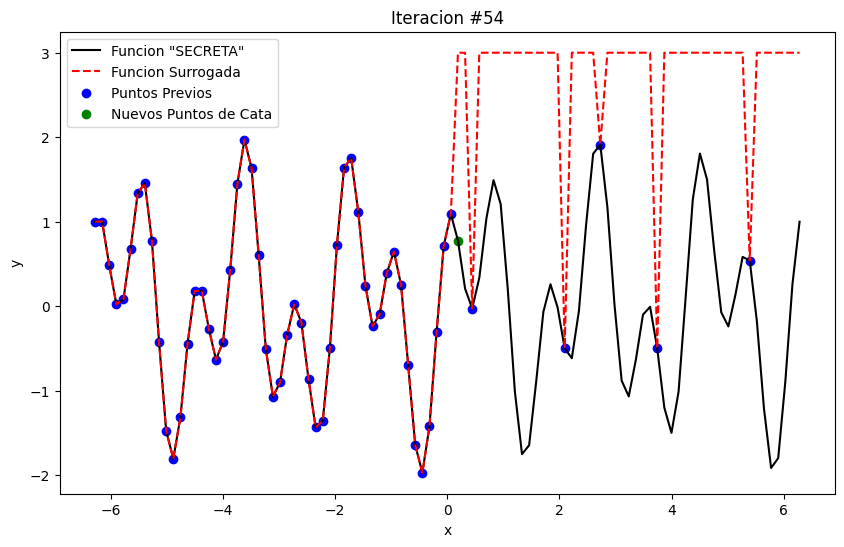

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


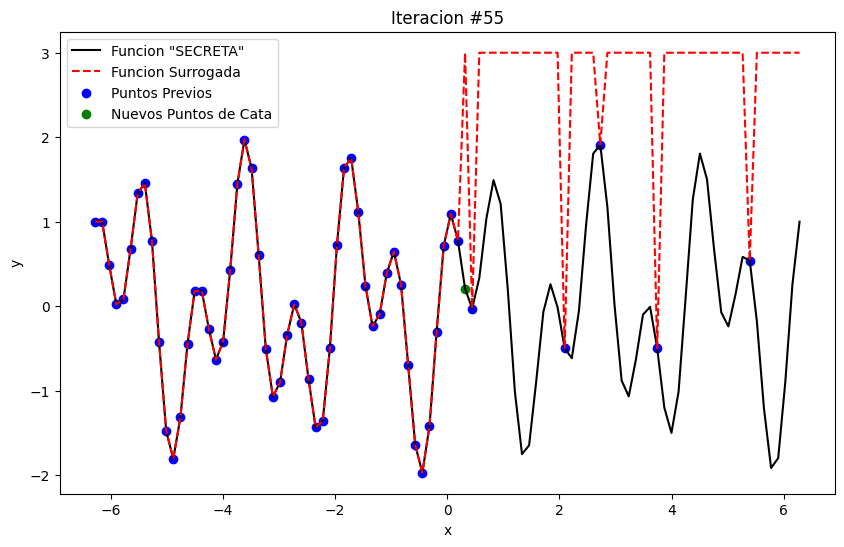

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


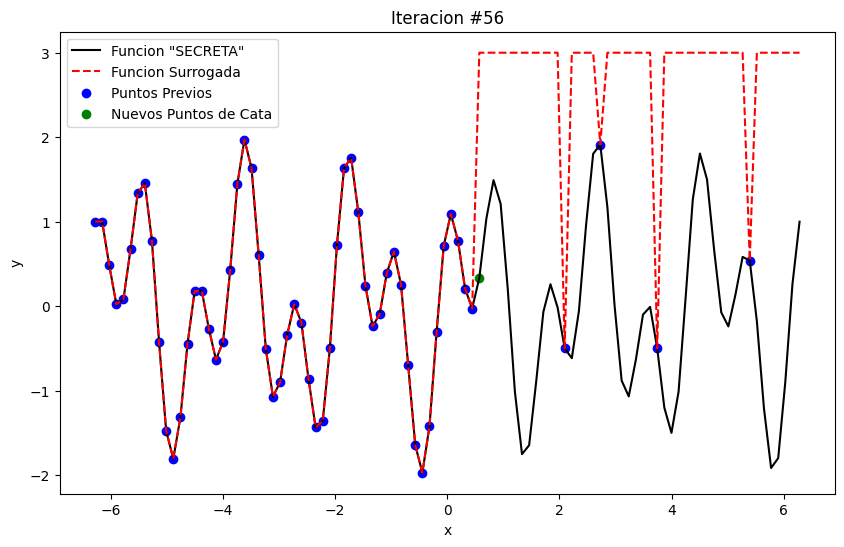

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


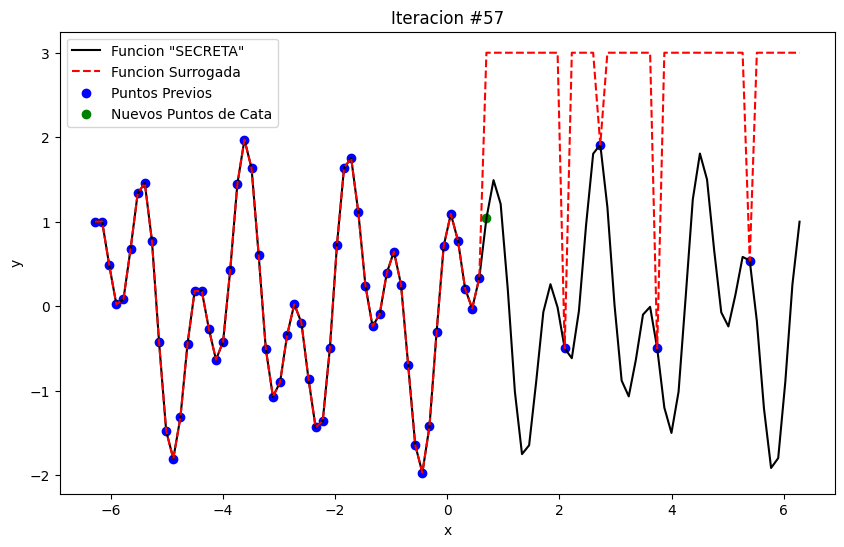

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


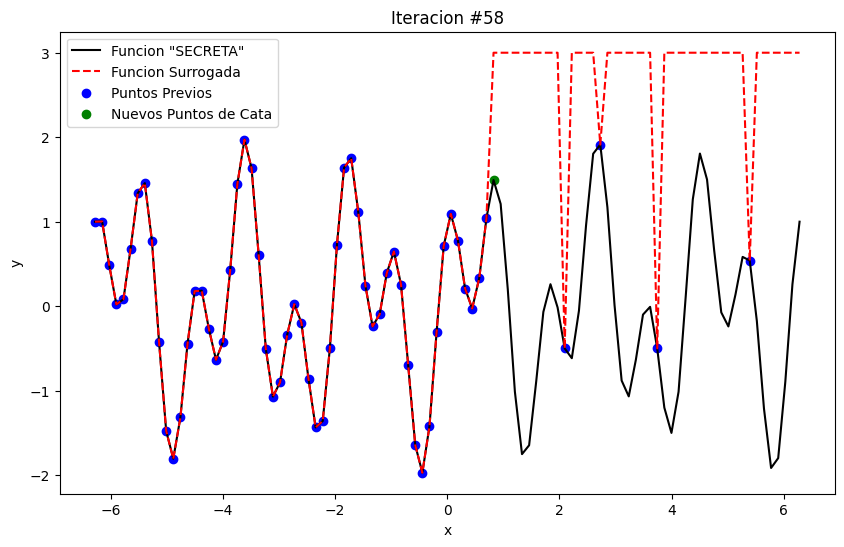

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


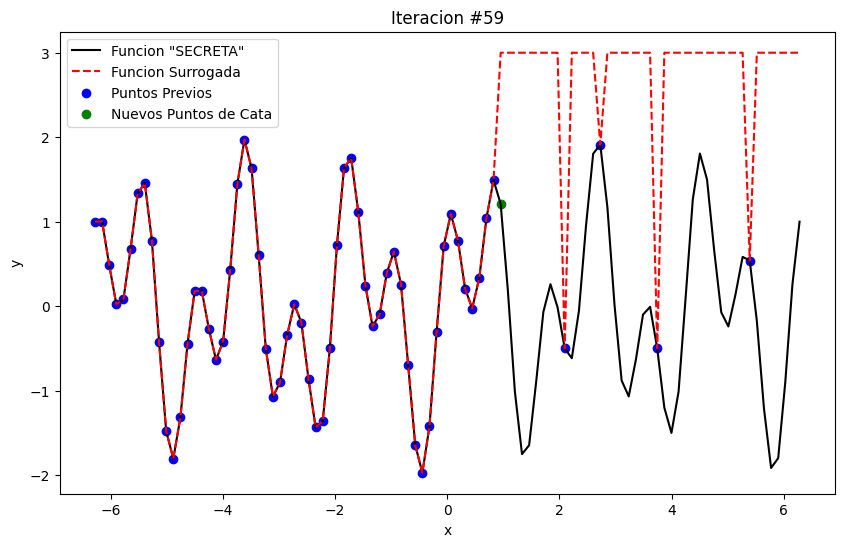

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


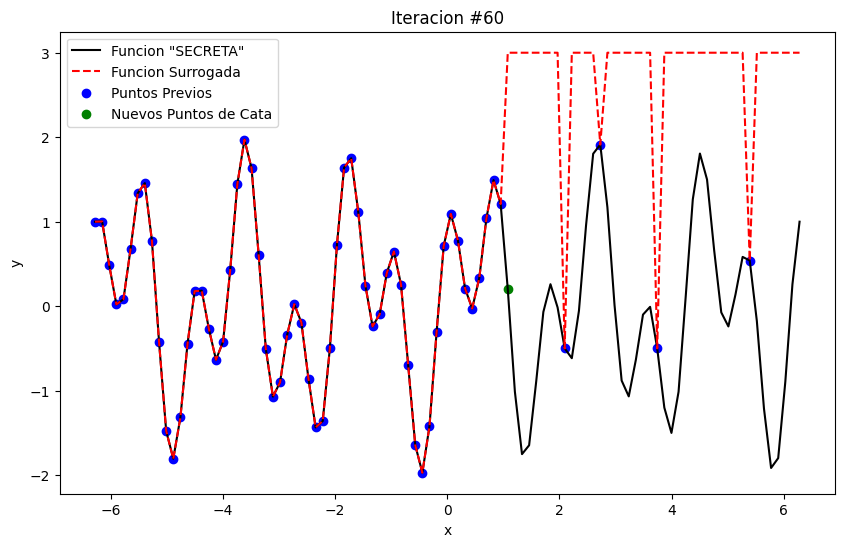

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


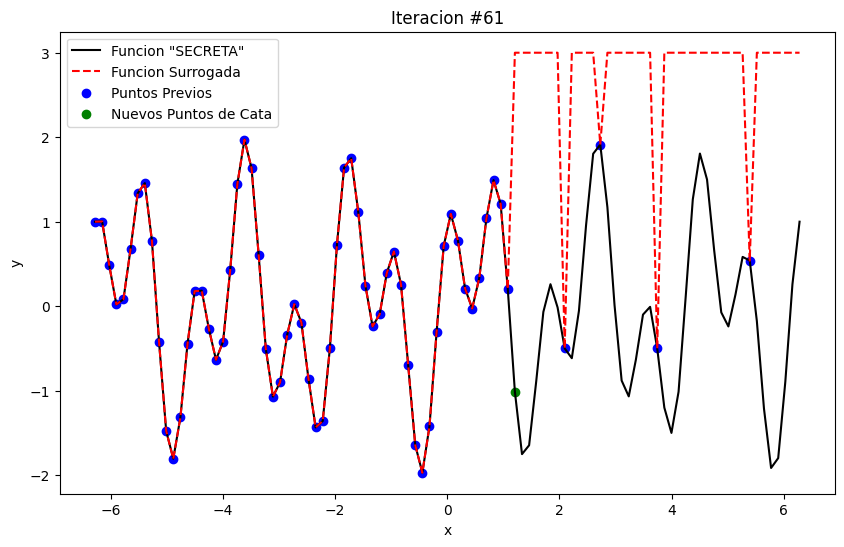

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


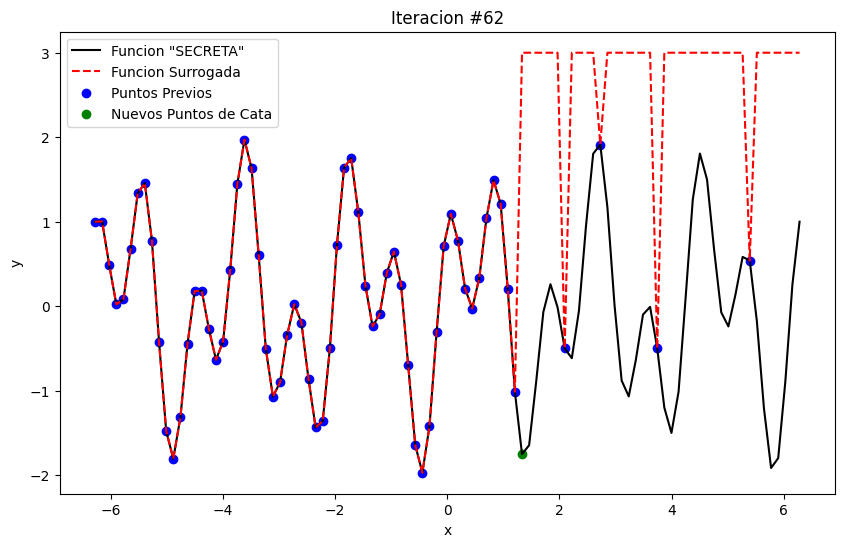

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


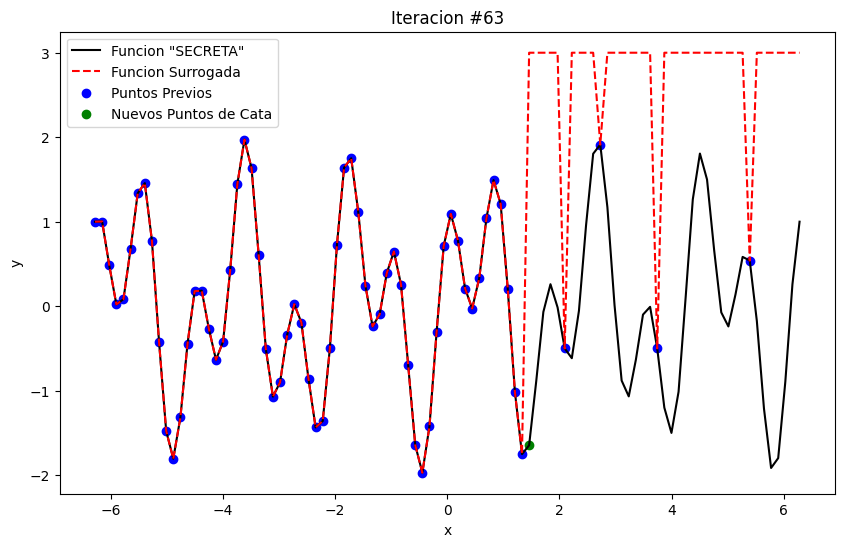

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


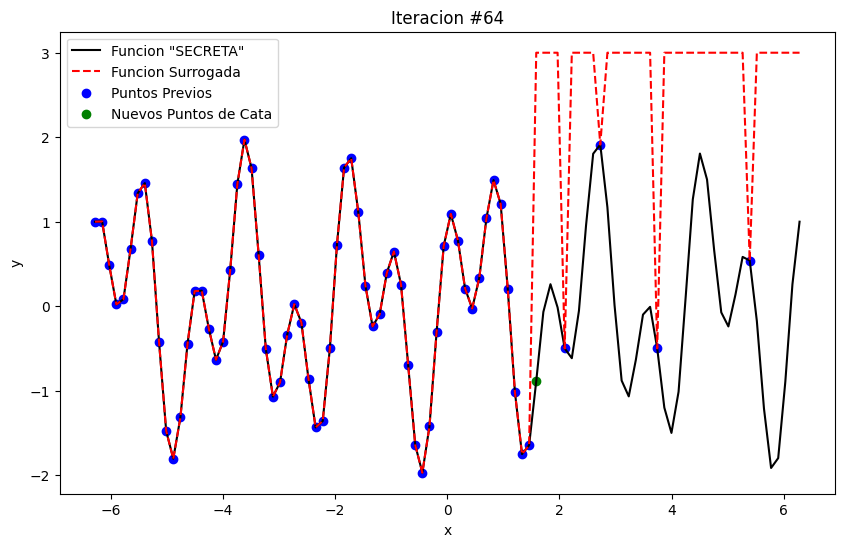

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


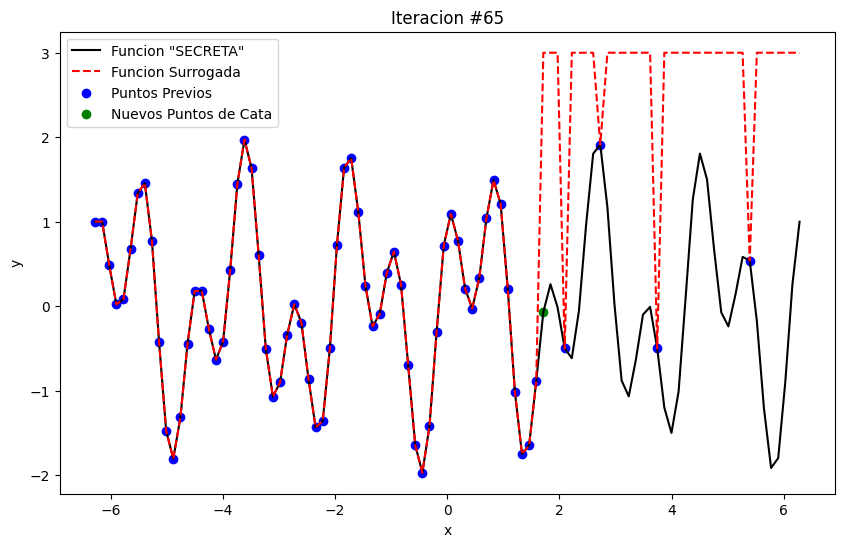

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


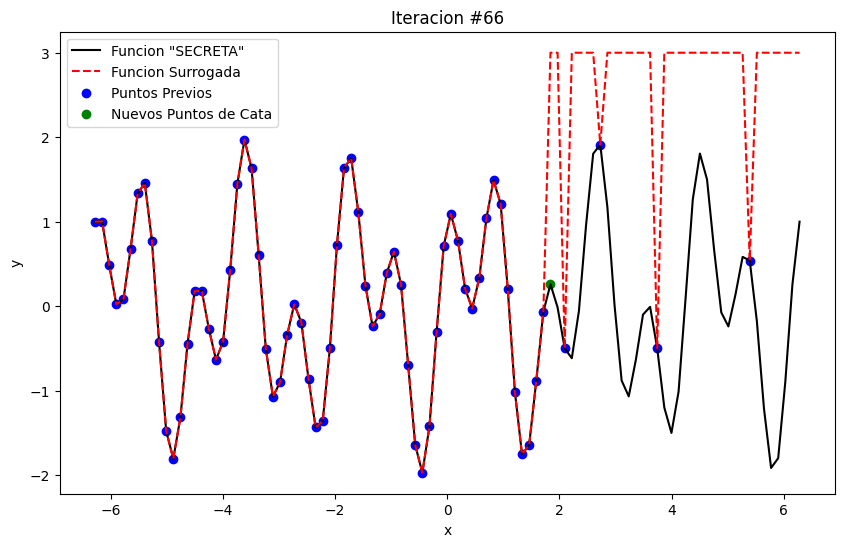

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


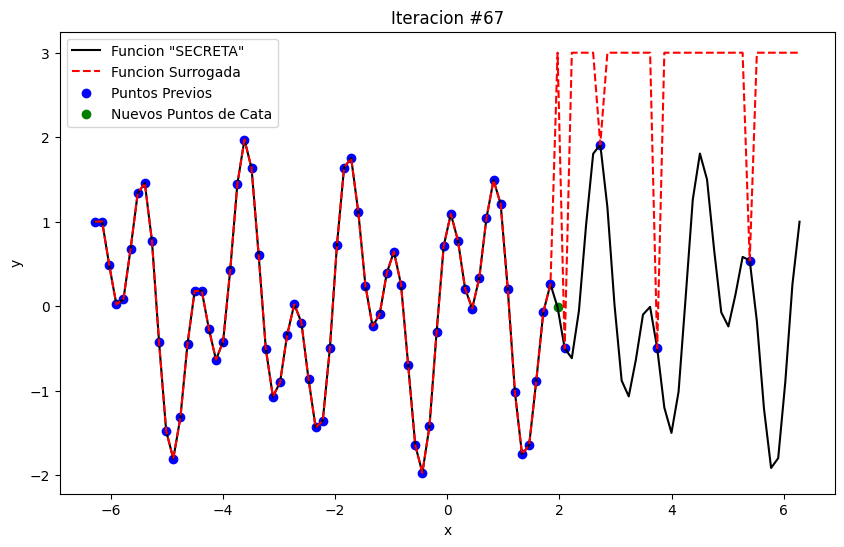

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


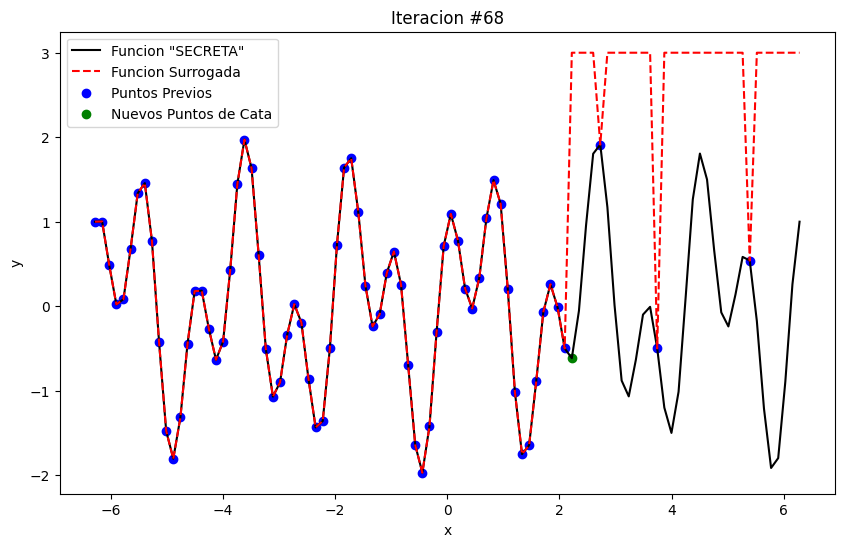

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


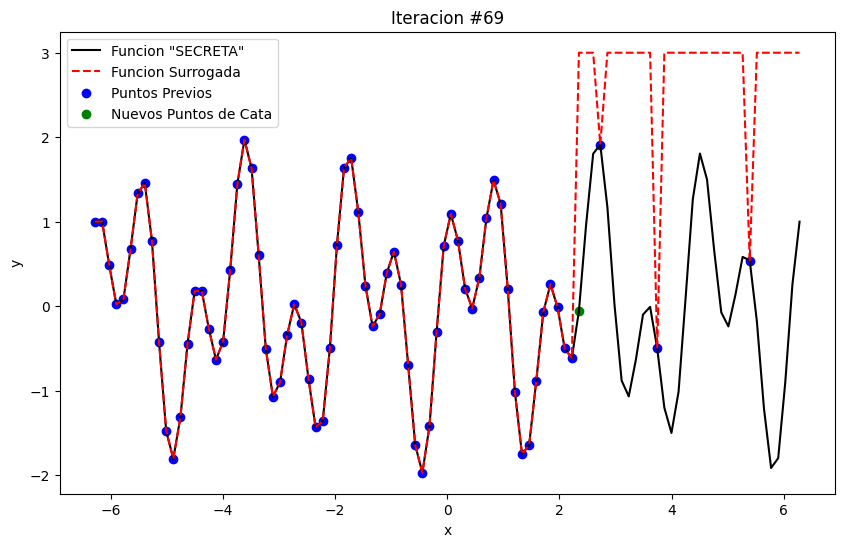

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


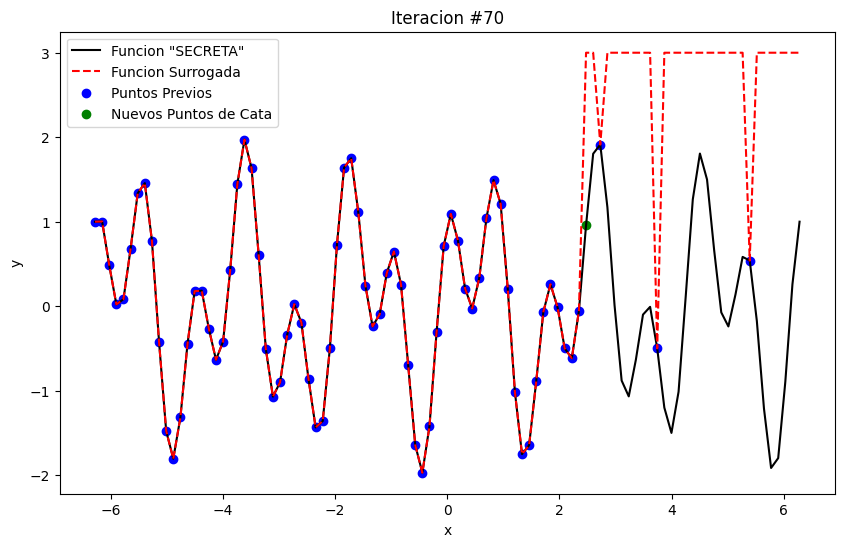

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


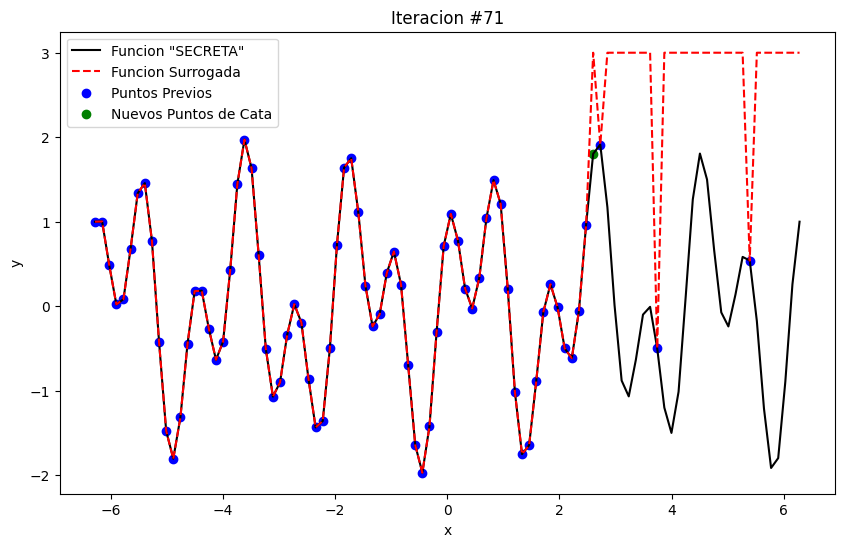

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


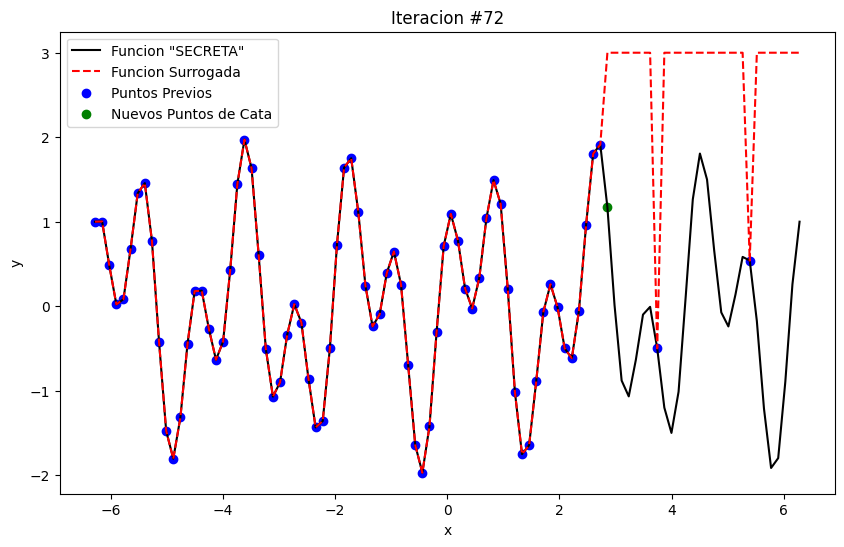

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


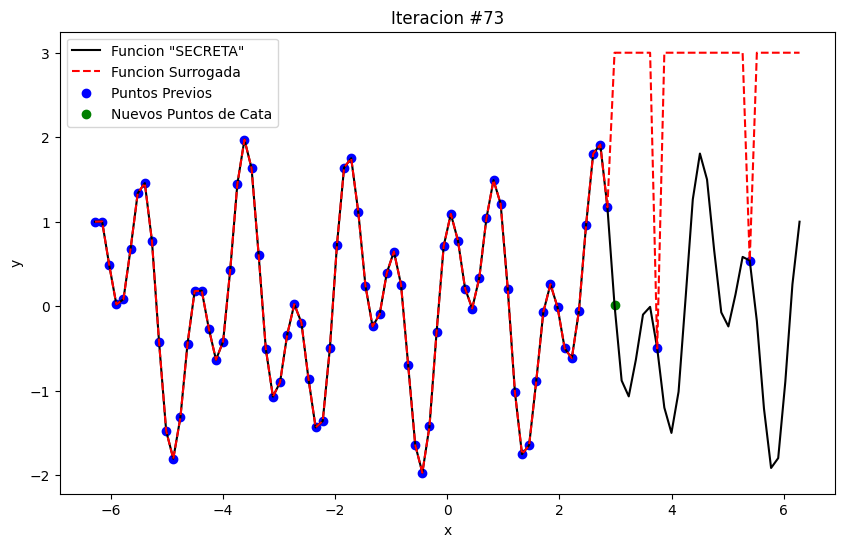

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


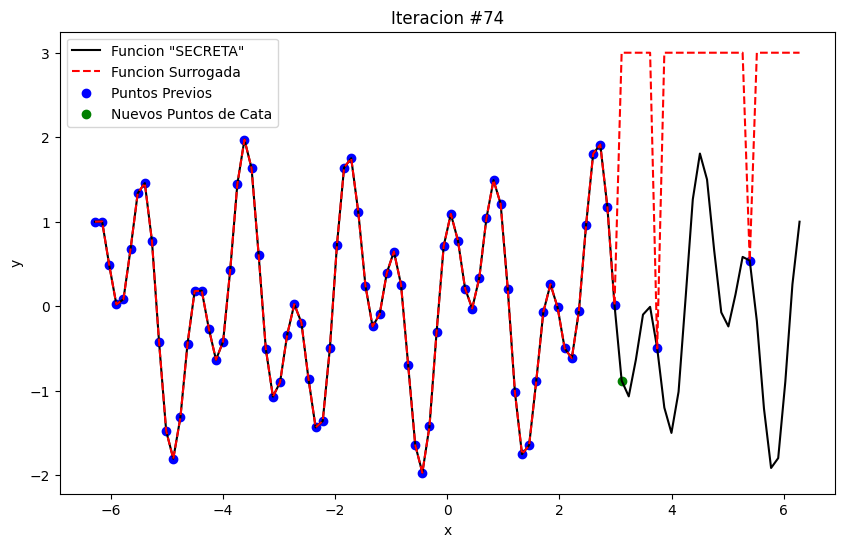

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


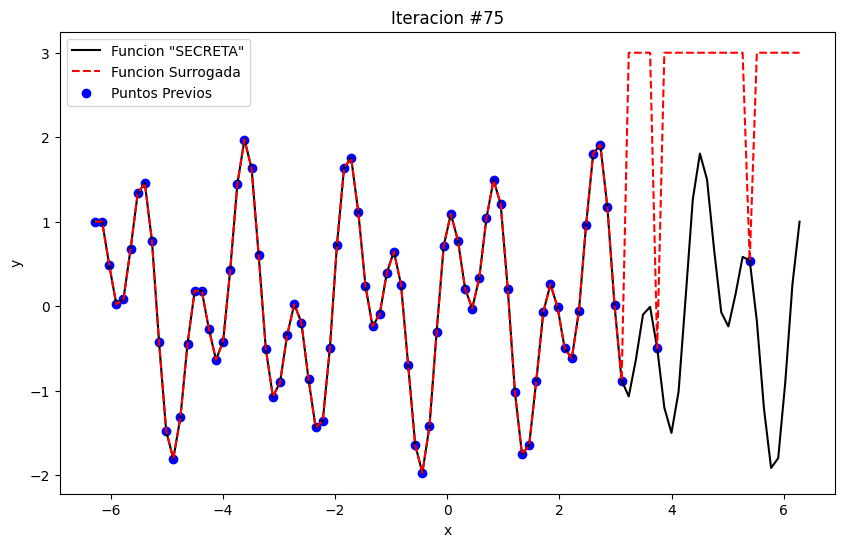

In [ ]:
iteraciones = 75


for i in range(iteraciones):
    plt.figure(figsize=(10, 6))
    # Ajustamos el modelo gaussiano:
    modelo_gp.fit(ejemplo_x.reshape(-1, 1), ejemplo_y)

    # Determinamos el punto con mejor posibildiad de mejora:
    mejor_idx = np.argmax(ejemplo_y)
    mejor_x = ejemplo_x[mejor_idx]
    mejor_y = ejemplo_y[mejor_idx]

    # Utilizamos un valor de beta, podriamos variarlo tambien de manera
    # iterativa, entre 1, 2 o 3:
    beta = 3.0

    # Generamos los limites de confianza superiores:
    conf = conf_superior(rango_x, modelo_gp, beta)

    # Dibujamos el resultado:
    plt.plot(rango_x, funcion_caja_negra(rango_x), color='black', label='Funcion "SECRETA"')
    plt.plot(rango_x, conf, color='red', linestyle='dashed', label='Funcion Surrogada')
    plt.scatter(ejemplo_x, ejemplo_y, color='blue', label='Puntos Previos')
    if i < iteraciones - 1:
        nueva_x = rango_x[np.argmax(conf)]  # Siguiente punto
        nueva_y = funcion_caja_negra(nueva_x)
        ejemplo_x = np.append(ejemplo_x, nueva_x)
        ejemplo_y = np.append(ejemplo_y, nueva_y)
        plt.scatter(nueva_x, nueva_y, color='green', label='Nuevos Puntos de Cata')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Iteracion #{i+1}")
    plt.legend()
    plt.show()